#BASE DE DADOS

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## OUTLIERS

In [8]:
import pandas as pd
import numpy as np

file_path = '/content/drive/My Drive/TCC/inmet/medias_anuais_2003_2024.csv'
df = pd.read_csv(file_path)

def identificar_outliers_com_ano(df, coluna_valor, sigma=3):
    print(f"\n{'='*60}")
    print(f"ANÁLISE DE OUTLIERS PARA: {coluna_valor.upper()}")
    print(f"Método: {sigma} desvios padrão (sigma)")
    print('='*60)

    if 'ano' not in df.columns:
        print("ERRO: Coluna 'ano' não encontrada no DataFrame.")
        return

    media = df[coluna_valor].mean()
    desvio_padrao = df[coluna_valor].std()

    print(f"\n► Estatísticas Descritivas:")
    print(f"Média (μ): {media:.4f}")
    print(f"Desvio Padrão (σ): {desvio_padrao:.4f}")

    limite_inferior = media - sigma * desvio_padrao
    limite_superior = media + sigma * desvio_padrao

    print(f"\n► Limites para identificação de outliers:")
    print(f"Limite Inferior (μ - {sigma}σ): {limite_inferior:.4f}")
    print(f"Limite Superior (μ + {sigma}σ): {limite_superior:.4f}")

    outliers_df = df[(df[coluna_valor] < limite_inferior) | (df[coluna_valor] > limite_superior)][['ano', coluna_valor]]

    print(f"\n► Resultados:")
    print(f"Total de observações: {len(df)}")
    print(f"Outliers encontrados: {len(outliers_df)}")

    if not outliers_df.empty:
        print("\nDetalhes dos Outliers (com ano correspondente):")
        print(outliers_df.to_string(index=False))

        outliers_df['sigmas_da_media'] = (outliers_df[coluna_valor] - media) / desvio_padrao
        print("\nDistância em sigmas da média:")
        for _, row in outliers_df.iterrows():
            print(f"Ano {row['ano']}: {row[coluna_valor]:.4f} → {row['sigmas_da_media']:.2f}σ da média")
    else:
        print("\nNenhum outlier encontrado com o critério especificado.")

    return outliers_df

if 'radiacao_global' in df.columns:
    print("\n" + "="*60)
    print("ANÁLISE PARA RADIAÇÃO GLOBAL")
    outliers_radiacao = identificar_outliers_com_ano(df, 'radiacao_global', 3)
else:
    print("Coluna 'radiacao_global' não encontrada no DataFrame.")

if 'velocidade_vento' in df.columns:
    print("\n" + "="*60)
    print("ANÁLISE PARA VELOCIDADE DO VENTO")
    outliers_vento = identificar_outliers_com_ano(df, 'velocidade_vento', 3)
else:
    print("Coluna 'velocidade_vento' não encontrada no DataFrame.")


ANÁLISE PARA RADIAÇÃO GLOBAL

ANÁLISE DE OUTLIERS PARA: RADIACAO_GLOBAL
Método: 3 desvios padrão (sigma)

► Estatísticas Descritivas:
Média (μ): 1742.0546
Desvio Padrão (σ): 1747.5211

► Limites para identificação de outliers:
Limite Inferior (μ - 3σ): -3500.5088
Limite Superior (μ + 3σ): 6984.6181

► Resultados:
Total de observações: 205
Outliers encontrados: 3

Detalhes dos Outliers (com ano correspondente):
 ano  radiacao_global
2005         14473.44
2006         20018.49
2007         11241.11

Distância em sigmas da média:
Ano 2005.0: 14473.4400 → 7.29σ da média
Ano 2006.0: 20018.4900 → 10.46σ da média
Ano 2007.0: 11241.1100 → 5.44σ da média

ANÁLISE PARA VELOCIDADE DO VENTO

ANÁLISE DE OUTLIERS PARA: VELOCIDADE_VENTO
Método: 3 desvios padrão (sigma)

► Estatísticas Descritivas:
Média (μ): 2.9712
Desvio Padrão (σ): 0.6154

► Limites para identificação de outliers:
Limite Inferior (μ - 3σ): 1.1249
Limite Superior (μ + 3σ): 4.8175

► Resultados:
Total de observações: 205
Outliers en

##BASE COMPLETA SEM OUTLIERS E DADOS VAZIOS

In [9]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/TCC/inmet/medias_anuais_2003_2024.csv')

outliers = [
    {'ano': 2005, 'radiacao_global': 14473.44},
    {'ano': 2006, 'radiacao_global': 20018.49},
    {'ano': 2007, 'radiacao_global': 11241.11},
    {'ano': 2017, 'velocidade_vento': 0.81}
]

for o in outliers:
    for col in o:
        if col != 'ano':
            df = df[~((df['ano'] == o['ano']) & (df[col] == o[col]))]

df_limpo = df.dropna(subset=['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento'])

df_original = pd.read_csv('/content/drive/My Drive/TCC/inmet/medias_anuais_2003_2024.csv')
removidos = df_original[~df_original.index.isin(df_limpo.index)][['cidade', 'ano']]

df_limpo.to_csv('/content/drive/My Drive/TCC/inmet/medias_anuais_2003_2024_limpo.csv', index=False)

print("Itens removidos (cidade e ano):")
print(removidos)

Itens removidos (cidade e ano):
            cidade   ano
1       ARCO VERDE  2004
4        PETROLINA  2005
6        PETROLINA  2006
11       PETROLINA  2007
113      GARANHUNS  2017
176       PALMARES  2022
179  SERRA TALHADA  2022
189      PETROLINA  2023
201      PETROLINA  2024


##BAIXANDO BASES | LEAVE-ONE-OUT

In [10]:
from google.colab import drive
import pandas as pd
from pathlib import Path

drive.mount('/content/drive')

input_file = '/content/drive/My Drive/TCC/inmet/medias_anuais_2003_2024_limpo.csv'
data = pd.read_csv(input_file)

data.columns = data.columns.str.lower().str.strip()

all_cities = data['cidade'].unique()

for excluded_city in all_cities:
    print(f"\nProcessando base sem a cidade: {excluded_city}")

    leave_one_out_data = data[data['cidade'] != excluded_city]

    output_path = f'/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_{excluded_city.lower().replace(" ", "_")}.csv'
    Path('/content/drive/My Drive/TCC/inmet/leave_one_out').mkdir(parents=True, exist_ok=True)

    leave_one_out_data.to_csv(output_path, index=False, encoding='utf-8')
    print(f"Arquivo salvo: {output_path}")

print("\nProcessamento completo! Todos os arquivos leave-one-out foram gerados.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Processando base sem a cidade: PETROLINA
Arquivo salvo: /content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_petrolina.csv

Processando base sem a cidade: ARCO VERDE
Arquivo salvo: /content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_arco_verde.csv

Processando base sem a cidade: CABROBO
Arquivo salvo: /content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_cabrobo.csv

Processando base sem a cidade: CARUARU
Arquivo salvo: /content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_caruaru.csv

Processando base sem a cidade: GARANHUNS
Arquivo salvo: /content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_garanhuns.csv

Processando base sem a cidade: FLORESTA
Arquivo salvo: /content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_floresta.csv

Processando base sem a cidade: IBIMIRI

## MÉDIAS

In [11]:
from google.colab import drive
import pandas as pd
from pathlib import Path

drive.mount('/content/drive')

input_file = '/content/drive/My Drive/TCC/inmet/medias_anuais_2003_2024_limpo.csv'
data = pd.read_csv(input_file)

data.columns = data.columns.str.lower().str.strip()

medias = data.groupby('cidade')[['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']].mean().reset_index()

medias_dir = '/content/drive/My Drive/TCC/inmet/médias'
Path(medias_dir).mkdir(parents=True, exist_ok=True)

medias_output = f'{medias_dir}/medias_por_cidade.csv'
medias.to_csv(medias_output, index=False, encoding='utf-8')

print(f"Arquivo de médias por cidade gerado: {medias_output}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Arquivo de médias por cidade gerado: /content/drive/My Drive/TCC/inmet/médias/medias_por_cidade.csv


In [12]:
from google.colab import drive
import pandas as pd
import numpy as np
from pathlib import Path
import unicodedata

drive.mount('/content/drive')

cities_data = {
    "SURUBIM":        {"latitude": -7.839722,   "longitude": -35.801111,    "altitude": 410},
    "CARUARU":        {"latitude": -8.365278,   "longitude": -36.028333,    "altitude": 852},
    "PALMARES":       {"latitude": -8.666667,   "longitude": -35.568056,    "altitude": 164.01},
    "ARCO VERDE":     {"latitude": -8.433611,   "longitude": -37.055556,    "altitude": 683.95},
    "CABROBO":        {"latitude": -8.503889,   "longitude": -39.315278,    "altitude": 342.74},
    "FLORESTA":       {"latitude": -8.598889,   "longitude": -38.584167,    "altitude": 327.42},
    "GARANHUNS":      {"latitude": -8.910833,   "longitude": -36.493333,    "altitude": 827.78},
    "IBIMIRIM":       {"latitude": -8.509444,   "longitude": -37.711667,    "altitude": 434.23},
    "OURICURI":       {"latitude": -7.885833,   "longitude": -40.102778,    "altitude": 457.85},
    "PETROLINA":      {"latitude": -9.388333,   "longitude": -40.523333,    "altitude": 372.32},
    "SALGUEIRO":      {"latitude": -8.058056,   "longitude": -39.096111,    "altitude": 447},
    "SERRA TALHADA":  {"latitude": -7.954167,   "longitude": -38.295,       "altitude": 499.02}
}

years = range(2003, 2025)

def clean_column_names(df, year):
    radiacao_key = "RADIACAO GLOBAL (KJ/m²)" if year <= 2019 else "RADIACAO GLOBAL (Kj/m²)"

    column_mapping = {
        "DATA (YYYY-MM-DD)": "data",
        "HORA (UTC)": "hora",
        "PRECIPITAÇÃO TOTAL, HORÁRIO (mm)": "precipitacao_total",
        "PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)": "pressao_nivel",
        radiacao_key: "radiacao_global",
        "TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)": "temperatura_ar",
        "TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)": "temperatura_max",
        "TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)": "temperatura_min",
        "UMIDADE RELATIVA DO AR, HORARIA (%)": "umidade",
        "VENTO, VELOCIDADE HORARIA (m/s)": "velocidade_vento",
        "Unnamed: 19": None
    }

    df = df.rename(columns={k: v for k, v in column_mapping.items() if v is not None})

    df = df.drop(columns=[col for col in df.columns if col not in column_mapping.values()], errors='ignore')

    df.columns = [unicodedata.normalize('NFKD', col).encode('ascii', 'ignore').decode('ascii').lower()
                 for col in df.columns]

    return df

all_data = []

for year in years:
    print(f"\nProcessando ano {year}...")
    file_base_path = f'/content/drive/My Drive/TCC/inmet/{year}'
    base_path = Path(file_base_path)

    for file in base_path.glob('*.CSV'):
        city = file.stem.split('_')[4]

        if city in cities_data:
            try:
                df = pd.read_csv(file, encoding='latin1', sep=';', skiprows=8)

                df = clean_column_names(df, year)

                df['cidade'] = city
                df['latitude'] = cities_data[city]['latitude']
                df['longitude'] = cities_data[city]['longitude']
                df['altitude'] = cities_data[city]['altitude']
                df['ano'] = year

                numeric_cols = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']
                for col in numeric_cols:
                    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

                df.replace({0: np.nan, -9999: np.nan}, inplace=True)

                all_data.append(df)

                print(f"Arquivo processado: {file.name}")

            except Exception as e:
                print(f"Erro ao processar {file.name}: {str(e)}")

if all_data:
    full_df = pd.concat(all_data, ignore_index=True)

if all_data:
    full_df = pd.concat(all_data, ignore_index=True)

    medias_gerais = full_df[['temperatura_max', 'temperatura_min',
                            'radiacao_global', 'velocidade_vento']].mean().round(2)

    print("\nMÉDIAS GERAIS DAS VARIÁVEIS CLIMÁTICAS (TODOS OS DADOS):")
    print("="*55)
    print(f"Temperatura Máxima: {medias_gerais['temperatura_max']} °C")
    print(f"Temperatura Mínima: {medias_gerais['temperatura_min']} °C")
    print(f"Radiação Global: {medias_gerais['radiacao_global']} KJ/m²")
    print(f"Velocidade do Vento: {medias_gerais['velocidade_vento']} m/s")
    print("="*55)
else:
    print("Nenhum dado válido foi processado.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Processando ano 2003...
Arquivo processado: INMET_NE_PE_A307_PETROLINA_21-02-2003_A_31-12-2003.CSV

Processando ano 2004...
Arquivo processado: INMET_NE_PE_A309_ARCO VERDE_20-11-2004_A_31-12-2004.CSV
Arquivo processado: INMET_NE_PE_A307_PETROLINA_01-01-2004_A_31-12-2004.CSV

Processando ano 2005...
Arquivo processado: INMET_NE_PE_A309_ARCO VERDE_01-01-2005_A_31-12-2005.CSV
Arquivo processado: INMET_NE_PE_A307_PETROLINA_01-01-2005_A_31-12-2005.CSV

Processando ano 2006...
Arquivo processado: INMET_NE_PE_A307_PETROLINA_01-01-2006_A_31-12-2006.CSV
Arquivo processado: INMET_NE_PE_A309_ARCO VERDE_01-01-2006_A_31-12-2006.CSV

Processando ano 2007...
Arquivo processado: INMET_NE_PE_A309_ARCO VERDE_01-01-2007_A_31-12-2007.CSV
Arquivo processado: INMET_NE_PE_A307_PETROLINA_01-01-2007_A_31-12-2007.CSV
Arquivo processado: INMET_NE_PE_A329_CABROBO_04-09-2007_A_31-12-200

##MAIORES E MENORES VALORES RADIAÇÃO E VELOCIDADE DO VENTO

In [13]:
import pandas as pd

caminho = '/content/drive/My Drive/TCC/inmet/medias_anuais_2003_2024_limpo.csv'
df_limpo = pd.read_csv(caminho)

max_rad = df_limpo['radiacao_global'].max()
min_rad = df_limpo['radiacao_global'].min()
max_vento = df_limpo['velocidade_vento'].max()
min_vento = df_limpo['velocidade_vento'].min()

print("\nVALORES EXTREMOS DO DATASET LIMPO:")
print(f"→ Radiação Global: Máximo = {max_rad} | Mínimo = {min_rad}")
print(f"→ Velocidade do Vento: Máximo = {max_vento} | Mínimo = {min_vento}")


VALORES EXTREMOS DO DATASET LIMPO:
→ Radiação Global: Máximo = 2390.0 | Mínimo = 1.15
→ Velocidade do Vento: Máximo = 4.73 | Mínimo = 1.35


In [14]:
import pandas as pd

caminho = '/content/drive/My Drive/TCC/inmet/medias_anuais_2003_2024.csv'
df_limpo = pd.read_csv(caminho)

def get_extremes(df, column, n=3, ascending=True):
    return df.sort_values(by=column, ascending=ascending).head(n)[[column]]

print("\n--- RADIAÇÃO GLOBAL ---")
print("3 MAIORES valores:")
print(get_extremes(df_limpo, 'radiacao_global', ascending=False))
print("\n3 MENORES valores:")
print(get_extremes(df_limpo, 'radiacao_global', ascending=True))

print("\n--- VELOCIDADE DO VENTO ---")
print("3 MAIORES valores:")
print(get_extremes(df_limpo, 'velocidade_vento', ascending=False))
print("\n3 MENORES valores:")
print(get_extremes(df_limpo, 'velocidade_vento', ascending=True))


--- RADIAÇÃO GLOBAL ---
3 MAIORES valores:
    radiacao_global
6          20018.49
4          14473.44
11         11241.11

3 MENORES valores:
     radiacao_global
164             1.15
152           172.96
140           182.81

--- VELOCIDADE DO VENTO ---
3 MAIORES valores:
     velocidade_vento
8                4.73
168              4.60
9                4.40

3 MENORES valores:
     velocidade_vento
113              0.81
194              1.35
108              1.57


#BASE SEM ARCO VERDE

##IDW ARCO VERDE

In [15]:
import pandas as pd
import numpy as np
from math import sqrt, cos, pi

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_arcoverde.csv'
df = pd.read_csv(file_path)

def calculate_distance(lat1, lon1, alt1, lat2, lon2, alt2):
    dx = (lon2 - lon1) * 111.32 * cos((lat1 + lat2) * pi / 360)
    dy = (lat2 - lat1) * 111.32
    dz = (alt2 - alt1) / 1000
    return sqrt(dx**2 + dy**2 + dz**2)

def idw_interpolation(lat, lon, alt, known_points, power=2):
    numerator = 0
    denominator = 0

    for _, row in known_points.iterrows():
        d = calculate_distance(lat, lon, alt,
                             row['latitude'], row['longitude'], row['altitude'])
        if d == 0:
            return row['value']
        weight = 1 / (d ** power)
        numerator += weight * row['value']
        denominator += weight

    return numerator / denominator if denominator != 0 else np.nan

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = idw_interpolation(latitude, longitude, altitude, valid_points, power=2)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW".center(60))
    print("="*60)

    print("\n🌦️ Variáveis Interpoladas:")
    vars_desc = {
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)',
        'radiacao_global': 'Radiação Global (Kj/m²)'
    }

    for var, value in predictions['Variáveis'].items():
        if isinstance(value, str):
            print(f"  → {vars_desc[var]}: {value}")
        else:
            print(f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)

print("Exemplo de interpolação para Arco Verde")
display_predictions(-8.4336, -37.0555, 683.95)

Exemplo de interpolação para Arco Verde

         PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW          

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1533.92
  → Temperatura Máxima (°C): 25.15
  → Temperatura Mínima (°C): 23.86
  → Velocidade do Vento (m/s): 2.84



##KRIGAGEM ARCO VERDE

In [16]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from math import sqrt
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_arcoverde.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError(f"Arquivo não encontrado: {file_path}\n"
                          "Verifique o caminho e se o arquivo foi gerado corretamente.")

def kriging_interpolation(latitude, longitude, altitude, known_points, var_name):
    if len(known_points) < 3:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Krigagem da variável {var_name}")
        return np.mean(known_points['value'])

    try:
        X = known_points[['latitude', 'longitude', 'altitude']].values
        y = known_points['value'].values

        kernel = ConstantKernel(constant_value=1.0,
                              constant_value_bounds=(1e-3, 1e6)) * RBF(length_scale=1.0,
                                                                      length_scale_bounds=(1e-3, 1e6))

        gp = GaussianProcessRegressor(
            kernel=kernel,
            alpha=1e-5,
            n_restarts_optimizer=10,
            random_state=42,
            normalize_y=True
        )

        gp.fit(X, y)
        X_pred = np.array([[latitude, longitude, altitude]])
        return gp.predict(X_pred)[0]

    except Exception as e:
        print(f"Erro na Krigagem para {var_name}: {str(e)}")
        return np.mean(known_points['value'])

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = kriging_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print(f"PREVISÃO PARA PALMARES".center(60))
    print("="*60)
    print(f"Coordenadas: Lat={latitude}, Lon={longitude}, Alt={altitude}m")

    print("\n🌦️ Variáveis Interpoladas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        print(f"  → {vars_desc[var]}: {value if isinstance(value, str) else f'{value:.2f}'}")

    print("\n" + "="*60)

print("Exemplo de interpolação para Arco Verde")
display_predictions(-8.4336, -37.0555, 683.95)

Exemplo de interpolação para Arco Verde

                   PREVISÃO PARA PALMARES                   
Coordenadas: Lat=-8.4336, Lon=-37.0555, Alt=683.95m

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1542.86
  → Temperatura Máxima (°C): 26.24
  → Temperatura Mínima (°C): 24.93
  → Velocidade do Vento (m/s): 2.90



##RANDOM FOREST ARCO VERDE

In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from math import sqrt

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_arcoverde.csv'
df = pd.read_csv(file_path)

def rf_interpolation(latitude, longitude, altitude, known_points, var_name):
    if len(known_points) < 10:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Random Forest da variável {var_name}")
        return np.mean(known_points['value'])

    X = known_points[['latitude', 'longitude', 'altitude']].values
    y = known_points['value'].values

    rf = RandomForestRegressor(n_estimators=100,
                             random_state=42,
                             max_depth=5,
                             min_samples_split=3)
    rf.fit(X, y)

    X_new = np.array([[latitude, longitude, altitude]])

    y_new = rf.predict(X_new)

    return y_new[0]

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = rf_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST".center(60))
    print("="*60)

    print("\n🌦️ Variáveis Previstas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        if isinstance(value, str):
            print(f"  → {vars_desc[var]}: {value}")
        else:
            print(f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)

print("Exemplo de interpolação para Arco Verde")
display_predictions(-8.4336, -37.0555, 683.95)

Exemplo de interpolação para Arco Verde

       PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST        

🌦️ Variáveis Previstas:
  → Radiação Global (Kj/m²): 1531.14
  → Temperatura Máxima (°C): 23.99
  → Temperatura Mínima (°C): 22.86
  → Velocidade do Vento (m/s): 2.81



#BASE SEM CABROBO

##IDW CABROBO

In [18]:
import pandas as pd
import numpy as np
from math import sqrt, cos, pi

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_cabrobo.csv'
df = pd.read_csv(file_path)

def calculate_distance(lat1, lon1, alt1, lat2, lon2, alt2):
    dx = (lon2 - lon1) * 111.32 * cos((lat1 + lat2) * pi / 360)
    dy = (lat2 - lat1) * 111.32
    dz = (alt2 - alt1) / 1000
    return sqrt(dx**2 + dy**2 + dz**2)

def idw_interpolation(lat, lon, alt, known_points, power=2):
    numerator = 0
    denominator = 0

    for _, row in known_points.iterrows():
        d = calculate_distance(lat, lon, alt,
                             row['latitude'], row['longitude'], row['altitude'])
        if d == 0:
            return row['value']
        weight = 1 / (d ** power)
        numerator += weight * row['value']
        denominator += weight

    return numerator / denominator if denominator != 0 else np.nan

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = idw_interpolation(latitude, longitude, altitude, valid_points, power=2)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW".center(60))
    print("="*60)

    print("\n🌦️ Variáveis Interpoladas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        if isinstance(value, str):
            print(f"  → {vars_desc[var]}: {value}")
        else:
            print(f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)

print("Exemplo de interpolação para Cabrobo")
display_predictions(-8.5038, -39.3152, 342.74)

Exemplo de interpolação para Cabrobo

         PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW          

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1693.19
  → Temperatura Máxima (°C): 27.64
  → Temperatura Mínima (°C): 26.21
  → Velocidade do Vento (m/s): 2.78



##KRIGAGEM CABROBO

In [19]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from math import sqrt
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_cabrobo.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError(f"Arquivo não encontrado: {file_path}\n"
                          "Verifique o caminho e se o arquivo foi gerado corretamente.")

def kriging_interpolation(latitude, longitude, altitude, known_points, var_name):
    if len(known_points) < 3:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Krigagem da variável {var_name}")
        return np.mean(known_points['value'])

    try:
        X = known_points[['latitude', 'longitude', 'altitude']].values
        y = known_points['value'].values

        kernel = ConstantKernel(constant_value=1.0,
                              constant_value_bounds=(1e-3, 1e6)) * RBF(length_scale=1.0,
                                                                      length_scale_bounds=(1e-3, 1e6))

        gp = GaussianProcessRegressor(
            kernel=kernel,
            alpha=1e-5,
            n_restarts_optimizer=10,
            random_state=42,
            normalize_y=True
        )

        gp.fit(X, y)
        X_pred = np.array([[latitude, longitude, altitude]])
        return gp.predict(X_pred)[0]

    except Exception as e:
        print(f"Erro na Krigagem para {var_name}: {str(e)}")
        return np.mean(known_points['value'])

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = kriging_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print(f"PREVISÃO PARA PALMARES".center(60))
    print("="*60)
    print(f"Coordenadas: Lat={latitude}, Lon={longitude}, Alt={altitude}m")

    print("\n🌦️ Variáveis Interpoladas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        print(f"  → {vars_desc[var]}: {value if isinstance(value, str) else f'{value:.2f}'}")

    print("\n" + "="*60)


print("Exemplo de interpolação para Cabrobo")
display_predictions(-8.5038, -39.3152, 342.74)

Exemplo de interpolação para Cabrobo

                   PREVISÃO PARA PALMARES                   
Coordenadas: Lat=-8.5038, Lon=-39.3152, Alt=342.74m

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1538.24
  → Temperatura Máxima (°C): 25.93
  → Temperatura Mínima (°C): 24.60
  → Velocidade do Vento (m/s): 2.91



##RANDOM FOREST CABROBO

In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from math import sqrt

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_cabrobo.csv'
df = pd.read_csv(file_path)

def rf_interpolation(latitude, longitude, altitude, known_points, var_name):
    if len(known_points) < 10:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Random Forest da variável {var_name}")
        return np.mean(known_points['value'])

    X = known_points[['latitude', 'longitude', 'altitude']].values
    y = known_points['value'].values

    rf = RandomForestRegressor(n_estimators=100,
                             random_state=42,
                             max_depth=5,
                             min_samples_split=3)
    rf.fit(X, y)

    X_new = np.array([[latitude, longitude, altitude]])

    y_new = rf.predict(X_new)

    return y_new[0]

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = rf_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST".center(60))
    print("="*60)

    print("\n🌦️ Variáveis Previstas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        if isinstance(value, str):
            print(f"  → {vars_desc[var]}: {value}")
        else:
            print(f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)

print("Exemplo de interpolação para Cabrobo")
display_predictions(-8.5038, -39.3152, 342.74)

Exemplo de interpolação para Cabrobo

       PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST        

🌦️ Variáveis Previstas:
  → Radiação Global (Kj/m²): 1679.07
  → Temperatura Máxima (°C): 27.81
  → Temperatura Mínima (°C): 26.47
  → Velocidade do Vento (m/s): 3.00



#BASE SEM CARUARU

##IDW CARUARU

In [21]:
import pandas as pd
import numpy as np
from math import sqrt, cos, pi

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_caruaru.csv'
df = pd.read_csv(file_path)

def calculate_distance(lat1, lon1, alt1, lat2, lon2, alt2):
    dx = (lon2 - lon1) * 111.32 * cos((lat1 + lat2) * pi / 360)
    dy = (lat2 - lat1) * 111.32
    dz = (alt2 - alt1) / 1000
    return sqrt(dx**2 + dy**2 + dz**2)

def idw_interpolation(lat, lon, alt, known_points, power=2):
    numerator = 0
    denominator = 0

    for _, row in known_points.iterrows():
        d = calculate_distance(lat, lon, alt,
                             row['latitude'], row['longitude'], row['altitude'])
        if d == 0:
            return row['value']
        weight = 1 / (d ** power)
        numerator += weight * row['value']
        denominator += weight

    return numerator / denominator if denominator != 0 else np.nan

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = idw_interpolation(latitude, longitude, altitude, valid_points, power=2)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW".center(60))
    print("="*60)

    print("\n🌦️ Variáveis Interpoladas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        if isinstance(value, str):
            print(f"  → {vars_desc[var]}: {value}")
        else:
            print(f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)

print("Exemplo de interpolação para Caruaru")
display_predictions(-8.3652, -36.0283, 852)

Exemplo de interpolação para Caruaru

         PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW          

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1419.38
  → Temperatura Máxima (°C): 24.79
  → Temperatura Mínima (°C): 23.50
  → Velocidade do Vento (m/s): 2.81



##KRIGAGEM CARUARU

In [22]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from math import sqrt
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_caruaru.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError(f"Arquivo não encontrado: {file_path}\n"
                          "Verifique o caminho e se o arquivo foi gerado corretamente.")

def kriging_interpolation(latitude, longitude, altitude, known_points, var_name):
    if len(known_points) < 3:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Krigagem da variável {var_name}")
        return np.mean(known_points['value'])

    try:
        X = known_points[['latitude', 'longitude', 'altitude']].values
        y = known_points['value'].values

        kernel = ConstantKernel(constant_value=1.0,
                              constant_value_bounds=(1e-3, 1e6)) * RBF(length_scale=1.0,
                                                                      length_scale_bounds=(1e-3, 1e6))

        gp = GaussianProcessRegressor(
            kernel=kernel,
            alpha=1e-5,
            n_restarts_optimizer=10,
            random_state=42,
            normalize_y=True
        )

        gp.fit(X, y)
        X_pred = np.array([[latitude, longitude, altitude]])
        return gp.predict(X_pred)[0]

    except Exception as e:
        print(f"Erro na Krigagem para {var_name}: {str(e)}")
        return np.mean(known_points['value'])

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = kriging_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print(f"PREVISÃO PARA PALMARES".center(60))
    print("="*60)
    print(f"Coordenadas: Lat={latitude}, Lon={longitude}, Alt={altitude}m")

    print("\n🌦️ Variáveis Interpoladas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        print(f"  → {vars_desc[var]}: {value if isinstance(value, str) else f'{value:.2f}'}")

    print("\n" + "="*60)


print("Exemplo de interpolação para Caruaru")
display_predictions(-8.3652, -36.0283, 852)

Exemplo de interpolação para Caruaru

                   PREVISÃO PARA PALMARES                   
Coordenadas: Lat=-8.3652, Lon=-36.0283, Alt=852m

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1561.95
  → Temperatura Máxima (°C): 26.35
  → Temperatura Mínima (°C): 25.03
  → Velocidade do Vento (m/s): 2.92



##RANDOM FOREST CARUARU

In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from math import sqrt

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_caruaru.csv'
df = pd.read_csv(file_path)

def rf_interpolation(latitude, longitude, altitude, known_points, var_name):
    if len(known_points) < 10:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Random Forest da variável {var_name}")
        return np.mean(known_points['value'])

    X = known_points[['latitude', 'longitude', 'altitude']].values
    y = known_points['value'].values

    rf = RandomForestRegressor(n_estimators=100,
                             random_state=42,
                             max_depth=5,
                             min_samples_split=3)
    rf.fit(X, y)

    X_new = np.array([[latitude, longitude, altitude]])

    y_new = rf.predict(X_new)

    return y_new[0]

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = rf_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST".center(60))
    print("="*60)

    print("\n🌦️ Variáveis Previstas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        if isinstance(value, str):
            print(f"  → {vars_desc[var]}: {value}")
        else:
            print(f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)

print("Exemplo de interpolação para Caruaru")
display_predictions(-8.3652, -36.0283, 852)

Exemplo de interpolação para Caruaru

       PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST        

🌦️ Variáveis Previstas:
  → Radiação Global (Kj/m²): 1563.94
  → Temperatura Máxima (°C): 23.70
  → Temperatura Mínima (°C): 22.88
  → Velocidade do Vento (m/s): 2.75



#BASE SEM FLORESTA

##IDW FLORESTA

In [24]:
import pandas as pd
import numpy as np
from math import sqrt, cos, pi

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_floresta.csv'
df = pd.read_csv(file_path)

def calculate_distance(lat1, lon1, alt1, lat2, lon2, alt2):
    dx = (lon2 - lon1) * 111.32 * cos((lat1 + lat2) * pi / 360)
    dy = (lat2 - lat1) * 111.32
    dz = (alt2 - alt1) / 1000
    return sqrt(dx**2 + dy**2 + dz**2)

def idw_interpolation(lat, lon, alt, known_points, power=2):
    numerator = 0
    denominator = 0

    for _, row in known_points.iterrows():
        d = calculate_distance(lat, lon, alt,
                             row['latitude'], row['longitude'], row['altitude'])
        if d == 0:
            return row['value']
        weight = 1 / (d ** power)
        numerator += weight * row['value']
        denominator += weight

    return numerator / denominator if denominator != 0 else np.nan

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = idw_interpolation(latitude, longitude, altitude, valid_points, power=2)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW".center(60))
    print("="*60)

    print("\n🌦️ Variáveis Interpoladas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        if isinstance(value, str):
            print(f"  → {vars_desc[var]}: {value}")
        else:
            print(f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)

print("Exemplo de interpolação para Floresta")
display_predictions(-8.5988, -38.5841, 327.42)

Exemplo de interpolação para Floresta

         PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW          

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1649.96
  → Temperatura Máxima (°C): 27.05
  → Temperatura Mínima (°C): 25.67
  → Velocidade do Vento (m/s): 2.81



##KRIGAGEM FLORESTA

In [25]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from math import sqrt
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_floresta.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError(f"Arquivo não encontrado: {file_path}\n"
                          "Verifique o caminho e se o arquivo foi gerado corretamente.")

def kriging_interpolation(latitude, longitude, altitude, known_points, var_name):
    if len(known_points) < 3:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Krigagem da variável {var_name}")
        return np.mean(known_points['value'])

    try:
        X = known_points[['latitude', 'longitude', 'altitude']].values
        y = known_points['value'].values

        kernel = ConstantKernel(constant_value=1.0,
                              constant_value_bounds=(1e-3, 1e6)) * RBF(length_scale=1.0,
                                                                      length_scale_bounds=(1e-3, 1e6))

        gp = GaussianProcessRegressor(
            kernel=kernel,
            alpha=1e-5,
            n_restarts_optimizer=10,
            random_state=42,
            normalize_y=True
        )

        gp.fit(X, y)
        X_pred = np.array([[latitude, longitude, altitude]])
        return gp.predict(X_pred)[0]

    except Exception as e:
        print(f"Erro na Krigagem para {var_name}: {str(e)}")
        return np.mean(known_points['value'])

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = kriging_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print(f"PREVISÃO PARA PALMARES".center(60))
    print("="*60)
    print(f"Coordenadas: Lat={latitude}, Lon={longitude}, Alt={altitude}m")

    print("\n🌦️ Variáveis Interpoladas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        print(f"  → {vars_desc[var]}: {value if isinstance(value, str) else f'{value:.2f}'}")

    print("\n" + "="*60)


print("Exemplo de interpolação para Floresta")
display_predictions(-8.5988, -38.5841, 327.42)

Exemplo de interpolação para Floresta

                   PREVISÃO PARA PALMARES                   
Coordenadas: Lat=-8.5988, Lon=-38.5841, Alt=327.42m

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1541.09
  → Temperatura Máxima (°C): 25.92
  → Temperatura Mínima (°C): 24.60
  → Velocidade do Vento (m/s): 2.92



##RANDOM FOREST FLORESTA

In [26]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from math import sqrt

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_floresta.csv'
df = pd.read_csv(file_path)

def rf_interpolation(latitude, longitude, altitude, known_points, var_name):
    if len(known_points) < 10:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Random Forest da variável {var_name}")
        return np.mean(known_points['value'])

    X = known_points[['latitude', 'longitude', 'altitude']].values
    y = known_points['value'].values

    rf = RandomForestRegressor(n_estimators=100,
                             random_state=42,
                             max_depth=5,
                             min_samples_split=3)
    rf.fit(X, y)

    X_new = np.array([[latitude, longitude, altitude]])

    y_new = rf.predict(X_new)

    return y_new[0]

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = rf_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST".center(60))
    print("="*60)

    print("\n🌦️ Variáveis Previstas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        if isinstance(value, str):
            print(f"  → {vars_desc[var]}: {value}")
        else:
            print(f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)

print("Exemplo de interpolação para Floresta")
display_predictions(-8.5988, -38.5841, 327.42)

Exemplo de interpolação para Floresta

       PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST        

🌦️ Variáveis Previstas:
  → Radiação Global (Kj/m²): 1602.00
  → Temperatura Máxima (°C): 27.41
  → Temperatura Mínima (°C): 26.04
  → Velocidade do Vento (m/s): 2.98



#BASE SEM GARANHUNS

##IDW GARANHUNS

In [27]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from math import sqrt
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_garanhuns.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError(f"Arquivo não encontrado: {file_path}\n"
                          "Verifique o caminho e se o arquivo foi gerado corretamente.")

def kriging_interpolation(latitude, longitude, altitude, known_points, var_name):
    if len(known_points) < 3:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Krigagem da variável {var_name}")
        return np.mean(known_points['value'])

    try:
        X = known_points[['latitude', 'longitude', 'altitude']].values
        y = known_points['value'].values

        kernel = ConstantKernel(constant_value=1.0,
                              constant_value_bounds=(1e-3, 1e6)) * RBF(length_scale=1.0,
                                                                      length_scale_bounds=(1e-3, 1e6))

        gp = GaussianProcessRegressor(
            kernel=kernel,
            alpha=1e-5,
            n_restarts_optimizer=10,
            random_state=42,
            normalize_y=True
        )

        gp.fit(X, y)
        X_pred = np.array([[latitude, longitude, altitude]])
        return gp.predict(X_pred)[0]

    except Exception as e:
        print(f"Erro na Krigagem para {var_name}: {str(e)}")
        return np.mean(known_points['value'])

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = kriging_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW".center(60))
    print("="*60)

    print("\n🌦️ Variáveis Interpoladas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        if isinstance(value, str):
            print(f"  → {vars_desc[var]}: {value}")
        else:
            print(f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)

print("Exemplo de interpolação para Garanhuns")
display_predictions(-8.9108, -36.4933, 827.78)

Exemplo de interpolação para Garanhuns

         PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW          

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1557.08
  → Temperatura Máxima (°C): 26.47
  → Temperatura Mínima (°C): 25.14
  → Velocidade do Vento (m/s): 2.95



##KRIGAGEM GARANHUNS

In [28]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from math import sqrt
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_garanhuns.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError(f"Arquivo não encontrado: {file_path}\n"
                          "Verifique o caminho e se o arquivo foi gerado corretamente.")

def kriging_interpolation(latitude, longitude, altitude, known_points, var_name):
    if len(known_points) < 3:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Krigagem da variável {var_name}")
        return np.mean(known_points['value'])

    try:
        X = known_points[['latitude', 'longitude', 'altitude']].values
        y = known_points['value'].values

        kernel = ConstantKernel(constant_value=1.0,
                              constant_value_bounds=(1e-3, 1e6)) * RBF(length_scale=1.0,
                                                                      length_scale_bounds=(1e-3, 1e6))

        gp = GaussianProcessRegressor(
            kernel=kernel,
            alpha=1e-5,
            n_restarts_optimizer=10,
            random_state=42,
            normalize_y=True
        )

        gp.fit(X, y)
        X_pred = np.array([[latitude, longitude, altitude]])
        return gp.predict(X_pred)[0]

    except Exception as e:
        print(f"Erro na Krigagem para {var_name}: {str(e)}")
        return np.mean(known_points['value'])

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = kriging_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print(f"PREVISÃO PARA PALMARES".center(60))
    print("="*60)
    print(f"Coordenadas: Lat={latitude}, Lon={longitude}, Alt={altitude}m")

    print("\n🌦️ Variáveis Interpoladas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        print(f"  → {vars_desc[var]}: {value if isinstance(value, str) else f'{value:.2f}'}")

    print("\n" + "="*60)


print("Exemplo de interpolação para Garanhuns")
display_predictions(-8.9108, -36.4933, 827.78)

Exemplo de interpolação para Garanhuns

                   PREVISÃO PARA PALMARES                   
Coordenadas: Lat=-8.9108, Lon=-36.4933, Alt=827.78m

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1557.08
  → Temperatura Máxima (°C): 26.47
  → Temperatura Mínima (°C): 25.14
  → Velocidade do Vento (m/s): 2.95



##Random Forest Garanhuns

In [29]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from math import sqrt

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_garanhuns.csv'
df = pd.read_csv(file_path)

def rf_interpolation(latitude, longitude, altitude, known_points, var_name):
    if len(known_points) < 10:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Random Forest da variável {var_name}")
        return np.mean(known_points['value'])

    X = known_points[['latitude', 'longitude', 'altitude']].values
    y = known_points['value'].values

    rf = RandomForestRegressor(n_estimators=100,
                             random_state=42,
                             max_depth=5,
                             min_samples_split=3)
    rf.fit(X, y)

    X_new = np.array([[latitude, longitude, altitude]])

    y_new = rf.predict(X_new)

    return y_new[0]

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = rf_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST".center(60))
    print("="*60)


    print("\n🌦️ Variáveis Previstas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        if isinstance(value, str):
            print(f"  → {vars_desc[var]}: {value}")
        else:
            print(f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)

print("Exemplo de interpolação para Garanhuns")
display_predictions(-8.9108, -36.4933, 827.78)

Exemplo de interpolação para Garanhuns

       PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST        

🌦️ Variáveis Previstas:
  → Radiação Global (Kj/m²): 1421.13
  → Temperatura Máxima (°C): 24.03
  → Temperatura Mínima (°C): 22.76
  → Velocidade do Vento (m/s): 2.95



#BASE SEM IBIMIRIM

##IDW IBIMIRIM

In [30]:
import pandas as pd
import numpy as np
from math import sqrt, cos, pi

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_ibimirim.csv'
df = pd.read_csv(file_path)

def calculate_distance(lat1, lon1, alt1, lat2, lon2, alt2):
    dx = (lon2 - lon1) * 111.32 * cos((lat1 + lat2) * pi / 360)
    dy = (lat2 - lat1) * 111.32
    dz = (alt2 - alt1) / 1000
    return sqrt(dx**2 + dy**2 + dz**2)

def idw_interpolation(lat, lon, alt, known_points, power=2):
    numerator = 0
    denominator = 0

    for _, row in known_points.iterrows():
        d = calculate_distance(lat, lon, alt,
                             row['latitude'], row['longitude'], row['altitude'])
        if d == 0:
            return row['value']
        weight = 1 / (d ** power)
        numerator += weight * row['value']
        denominator += weight

    return numerator / denominator if denominator != 0 else np.nan

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = idw_interpolation(latitude, longitude, altitude, valid_points, power=2)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW".center(60))
    print("="*60)

    print("\n🌦️ Variáveis Interpoladas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        if isinstance(value, str):
            print(f"  → {vars_desc[var]}: {value}")
        else:
            print(f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)

print("Exemplo de interpolação para Ibimirim")
display_predictions(-8.5094, -37.7116, 434.23)

Exemplo de interpolação para Ibimirim

         PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW          

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1585.05
  → Temperatura Máxima (°C): 25.84
  → Temperatura Mínima (°C): 24.50
  → Velocidade do Vento (m/s): 2.95



##KRIGAGEM IBIMIRIM

In [31]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from math import sqrt
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_ibimirim.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError(f"Arquivo não encontrado: {file_path}\n"
                          "Verifique o caminho e se o arquivo foi gerado corretamente.")

def kriging_interpolation(latitude, longitude, altitude, known_points, var_name):
    if len(known_points) < 3:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Krigagem da variável {var_name}")
        return np.mean(known_points['value'])

    try:
        X = known_points[['latitude', 'longitude', 'altitude']].values
        y = known_points['value'].values

        kernel = ConstantKernel(constant_value=1.0,
                              constant_value_bounds=(1e-3, 1e6)) * RBF(length_scale=1.0,
                                                                      length_scale_bounds=(1e-3, 1e6))

        gp = GaussianProcessRegressor(
            kernel=kernel,
            alpha=1e-5,
            n_restarts_optimizer=10,
            random_state=42,
            normalize_y=True
        )

        gp.fit(X, y)
        X_pred = np.array([[latitude, longitude, altitude]])
        return gp.predict(X_pred)[0]

    except Exception as e:
        print(f"Erro na Krigagem para {var_name}: {str(e)}")
        return np.mean(known_points['value'])

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = kriging_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print(f"PREVISÃO PARA PALMARES".center(60))
    print("="*60)
    print(f"Coordenadas: Lat={latitude}, Lon={longitude}, Alt={altitude}m")

    print("\n🌦️ Variáveis Interpoladas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        print(f"  → {vars_desc[var]}: {value if isinstance(value, str) else f'{value:.2f}'}")

    print("\n" + "="*60)


print("Exemplo de interpolação para Ibimirim")
display_predictions(-8.5094, -37.7116, 434.23)

Exemplo de interpolação para Ibimirim

                   PREVISÃO PARA PALMARES                   
Coordenadas: Lat=-8.5094, Lon=-37.7116, Alt=434.23m

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1538.54
  → Temperatura Máxima (°C): 26.03
  → Temperatura Mínima (°C): 24.72
  → Velocidade do Vento (m/s): 2.94



##RANDOM FOREST IBIMIRIM

In [32]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from math import sqrt

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_ibimirim.csv'
df = pd.read_csv(file_path)

def rf_interpolation(latitude, longitude, altitude, known_points, var_name):
    if len(known_points) < 10:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Random Forest da variável {var_name}")
        return np.mean(known_points['value'])

    X = known_points[['latitude', 'longitude', 'altitude']].values
    y = known_points['value'].values

    rf = RandomForestRegressor(n_estimators=100,
                             random_state=42,
                             max_depth=5,
                             min_samples_split=3)
    rf.fit(X, y)

    X_new = np.array([[latitude, longitude, altitude]])

    y_new = rf.predict(X_new)

    return y_new[0]

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = rf_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST".center(60))
    print("="*60)

    print("\n🌦️ Variáveis Previstas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        if isinstance(value, str):
            print(f"  → {vars_desc[var]}: {value}")
        else:
            print(f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)

print("Exemplo de interpolação para Ibimirim")
display_predictions(-8.5094, -37.7116, 434.23)

Exemplo de interpolação para Ibimirim

       PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST        

🌦️ Variáveis Previstas:
  → Radiação Global (Kj/m²): 1588.53
  → Temperatura Máxima (°C): 26.95
  → Temperatura Mínima (°C): 25.61
  → Velocidade do Vento (m/s): 2.83



#BASE SEM OURICURI

##IDW OURICURI

In [33]:
import pandas as pd
import numpy as np
from math import sqrt, cos, pi

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_ouricuri.csv'
df = pd.read_csv(file_path)

def calculate_distance(lat1, lon1, alt1, lat2, lon2, alt2):
    dx = (lon2 - lon1) * 111.32 * cos((lat1 + lat2) * pi / 360)
    dy = (lat2 - lat1) * 111.32
    dz = (alt2 - alt1) / 1000
    return sqrt(dx**2 + dy**2 + dz**2)

def idw_interpolation(lat, lon, alt, known_points, power=2):
    numerator = 0
    denominator = 0

    for _, row in known_points.iterrows():
        d = calculate_distance(lat, lon, alt,
                             row['latitude'], row['longitude'], row['altitude'])
        if d == 0:
            return row['value']
        weight = 1 / (d ** power)
        numerator += weight * row['value']
        denominator += weight

    return numerator / denominator if denominator != 0 else np.nan

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = idw_interpolation(latitude, longitude, altitude, valid_points, power=2)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW".center(60))
    print("="*60)

    print("\n🌦️ Variáveis Interpoladas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        if isinstance(value, str):
            print(f"  → {vars_desc[var]}: {value}")
        else:
            print(f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)

print("Exemplo de interpolação para Ouricuri")
display_predictions(-7.8858, -40.1028, 457.85)

Exemplo de interpolação para Ouricuri

         PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW          

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1649.93
  → Temperatura Máxima (°C): 27.47
  → Temperatura Mínima (°C): 26.12
  → Velocidade do Vento (m/s): 2.93



##KRIGAGEM OURICUCI

In [34]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from math import sqrt
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_ouricuri.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError(f"Arquivo não encontrado: {file_path}\n"
                          "Verifique o caminho e se o arquivo foi gerado corretamente.")

def kriging_interpolation(latitude, longitude, altitude, known_points, var_name):
    if len(known_points) < 3:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Krigagem da variável {var_name}")
        return np.mean(known_points['value'])

    try:
        X = known_points[['latitude', 'longitude', 'altitude']].values
        y = known_points['value'].values

        kernel = ConstantKernel(constant_value=1.0,
                              constant_value_bounds=(1e-3, 1e6)) * RBF(length_scale=1.0,
                                                                      length_scale_bounds=(1e-3, 1e6))

        gp = GaussianProcessRegressor(
            kernel=kernel,
            alpha=1e-5,
            n_restarts_optimizer=10,
            random_state=42,
            normalize_y=True
        )

        gp.fit(X, y)
        X_pred = np.array([[latitude, longitude, altitude]])
        return gp.predict(X_pred)[0]

    except Exception as e:
        print(f"Erro na Krigagem para {var_name}: {str(e)}")
        return np.mean(known_points['value'])

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = kriging_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print(f"PREVISÃO PARA PALMARES".center(60))
    print("="*60)
    print(f"Coordenadas: Lat={latitude}, Lon={longitude}, Alt={altitude}m")

    print("\n🌦️ Variáveis Interpoladas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        print(f"  → {vars_desc[var]}: {value if isinstance(value, str) else f'{value:.2f}'}")

    print("\n" + "="*60)


print("Exemplo de interpolação para Ouricuri")
display_predictions(-7.8858, -40.1028, 457.85)

Exemplo de interpolação para Ouricuri

                   PREVISÃO PARA PALMARES                   
Coordenadas: Lat=-7.8858, Lon=-40.1028, Alt=457.85m

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1541.45
  → Temperatura Máxima (°C): 29.05
  → Temperatura Mínima (°C): 27.32
  → Velocidade do Vento (m/s): 2.31



##RANDOM FOREST OURICURI

In [35]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from math import sqrt

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_ouricuri.csv'
df = pd.read_csv(file_path)

def rf_interpolation(latitude, longitude, altitude, known_points, var_name):
    if len(known_points) < 10:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Random Forest da variável {var_name}")
        return np.mean(known_points['value'])

    X = known_points[['latitude', 'longitude', 'altitude']].values
    y = known_points['value'].values

    rf = RandomForestRegressor(n_estimators=100,
                             random_state=42,
                             max_depth=5,
                             min_samples_split=3)
    rf.fit(X, y)

    X_new = np.array([[latitude, longitude, altitude]])

    y_new = rf.predict(X_new)

    return y_new[0]

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = rf_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST".center(60))
    print("="*60)

    print("\n🌦️ Variáveis Previstas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        if isinstance(value, str):
            print(f"  → {vars_desc[var]}: {value}")
        else:
            print(f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)

print("Exemplo de interpolação para Ouricuri")
display_predictions(-7.8858, -40.1028, 457.85)

Exemplo de interpolação para Ouricuri

       PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST        

🌦️ Variáveis Previstas:
  → Radiação Global (Kj/m²): 1696.17
  → Temperatura Máxima (°C): 27.91
  → Temperatura Mínima (°C): 26.46
  → Velocidade do Vento (m/s): 2.78



#BASE SEM PALMARES

##IDW PALMARES

In [36]:
import pandas as pd
import numpy as np
from math import sqrt, cos, pi

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_palmares.csv'
df = pd.read_csv(file_path)

def calculate_distance(lat1, lon1, alt1, lat2, lon2, alt2):
    dx = (lon2 - lon1) * 111.32 * cos((lat1 + lat2) * pi / 360)
    dy = (lat2 - lat1) * 111.32
    dz = (alt2 - alt1) / 1000
    return sqrt(dx**2 + dy**2 + dz**2)

def idw_interpolation(lat, lon, alt, known_points, power=2):
    numerator = 0
    denominator = 0

    for _, row in known_points.iterrows():
        d = calculate_distance(lat, lon, alt,
                             row['latitude'], row['longitude'], row['altitude'])
        if d == 0:
            return row['value']
        weight = 1 / (d ** power)
        numerator += weight * row['value']
        denominator += weight

    return numerator / denominator if denominator != 0 else np.nan

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = idw_interpolation(latitude, longitude, altitude, valid_points, power=2)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW".center(60))
    print("="*60)

    print("\n🌦️ Variáveis Interpoladas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        if isinstance(value, str):
            print(f"  → {vars_desc[var]}: {value}")
        else:
            print(f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)

print("Exemplo de interpolação para Palmares")
display_predictions(-8.6666, -35.5680, 164.01)

Exemplo de interpolação para Palmares

         PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW          

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1481.15
  → Temperatura Máxima (°C): 23.90
  → Temperatura Mínima (°C): 22.65
  → Velocidade do Vento (m/s): 3.08



##KRIGAGEM PALMARES

In [37]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from math import sqrt
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_palmares.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError(f"Arquivo não encontrado: {file_path}\n"
                          "Verifique o caminho e se o arquivo foi gerado corretamente.")

def kriging_interpolation(latitude, longitude, altitude, known_points, var_name):
    if len(known_points) < 3:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Krigagem da variável {var_name}")
        return np.mean(known_points['value'])

    try:
        X = known_points[['latitude', 'longitude', 'altitude']].values
        y = known_points['value'].values

        kernel = ConstantKernel(constant_value=1.0,
                              constant_value_bounds=(1e-3, 1e6)) * RBF(length_scale=1.0,
                                                                      length_scale_bounds=(1e-3, 1e6))

        gp = GaussianProcessRegressor(
            kernel=kernel,
            alpha=1e-5,
            n_restarts_optimizer=10,
            random_state=42,
            normalize_y=True
        )

        gp.fit(X, y)
        X_pred = np.array([[latitude, longitude, altitude]])
        return gp.predict(X_pred)[0]

    except Exception as e:
        print(f"Erro na Krigagem para {var_name}: {str(e)}")
        return np.mean(known_points['value'])

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = kriging_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print(f"PREVISÃO PARA PALMARES".center(60))
    print("="*60)
    print(f"Coordenadas: Lat={latitude}, Lon={longitude}, Alt={altitude}m")

    print("\n🌦️ Variáveis Interpoladas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        print(f"  → {vars_desc[var]}: {value if isinstance(value, str) else f'{value:.2f}'}")

    print("\n" + "="*60)


print("Exemplo de interpolação para Palmares")
display_predictions(-8.6666, -35.5680, 164.01)

Exemplo de interpolação para Palmares

                   PREVISÃO PARA PALMARES                   
Coordenadas: Lat=-8.6666, Lon=-35.568, Alt=164.01m

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1587.05
  → Temperatura Máxima (°C): 26.15
  → Temperatura Mínima (°C): 24.83
  → Velocidade do Vento (m/s): 3.01



##RANDOM FOREST PALMARES

In [38]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from math import sqrt

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_palmares.csv'
df = pd.read_csv(file_path)

def rf_interpolation(latitude, longitude, altitude, known_points, var_name):
    if len(known_points) < 10:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Random Forest da variável {var_name}")
        return np.mean(known_points['value'])

    X = known_points[['latitude', 'longitude', 'altitude']].values
    y = known_points['value'].values

    rf = RandomForestRegressor(n_estimators=100,
                             random_state=42,
                             max_depth=5,
                             min_samples_split=3)
    rf.fit(X, y)

    X_new = np.array([[latitude, longitude, altitude]])

    y_new = rf.predict(X_new)

    return y_new[0]

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = rf_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST".center(60))
    print("="*60)

    print("\n🌦️ Variáveis Previstas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        if isinstance(value, str):
            print(f"  → {vars_desc[var]}: {value}")
        else:
            print(f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)

print("Exemplo de interpolação para Palmares")
display_predictions(-8.6666, -35.5680, 164.01)

Exemplo de interpolação para Palmares

       PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST        

🌦️ Variáveis Previstas:
  → Radiação Global (Kj/m²): 1605.13
  → Temperatura Máxima (°C): 24.95
  → Temperatura Mínima (°C): 23.73
  → Velocidade do Vento (m/s): 3.11



#BASE SEM PETROLINA

##IDW PETROLINA

In [39]:
import pandas as pd
import numpy as np
from math import sqrt, cos, pi

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_petrolina.csv'
df = pd.read_csv(file_path)

def calculate_distance(lat1, lon1, alt1, lat2, lon2, alt2):
    dx = (lon2 - lon1) * 111.32 * cos((lat1 + lat2) * pi / 360)
    dy = (lat2 - lat1) * 111.32
    dz = (alt2 - alt1) / 1000
    return sqrt(dx**2 + dy**2 + dz**2)

def idw_interpolation(lat, lon, alt, known_points, power=2):
    numerator = 0
    denominator = 0

    for _, row in known_points.iterrows():
        d = calculate_distance(lat, lon, alt,
                             row['latitude'], row['longitude'], row['altitude'])
        if d == 0:
            return row['value']
        weight = 1 / (d ** power)
        numerator += weight * row['value']
        denominator += weight

    return numerator / denominator if denominator != 0 else np.nan

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = idw_interpolation(latitude, longitude, altitude, valid_points, power=2)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW".center(60))
    print("="*60)

    print("\n🌦️ Variáveis Interpoladas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        if isinstance(value, str):
            print(f"  → {vars_desc[var]}: {value}")
        else:
            print(f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)

print("Exemplo de interpolação para Petrolina")
display_predictions(-9.3883, -40.5233, 372.32)

Exemplo de interpolação para Petrolina

         PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW          

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1634.64
  → Temperatura Máxima (°C): 27.12
  → Temperatura Mínima (°C): 25.77
  → Velocidade do Vento (m/s): 2.91



##KRIGAGEM PETROLINA

In [40]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from math import sqrt
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_petrolina.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError(f"Arquivo não encontrado: {file_path}\n"
                          "Verifique o caminho e se o arquivo foi gerado corretamente.")

def kriging_interpolation(latitude, longitude, altitude, known_points, var_name):
    if len(known_points) < 3:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Krigagem da variável {var_name}")
        return np.mean(known_points['value'])

    try:
        X = known_points[['latitude', 'longitude', 'altitude']].values
        y = known_points['value'].values

        kernel = ConstantKernel(constant_value=1.0,
                              constant_value_bounds=(1e-3, 1e6)) * RBF(length_scale=1.0,
                                                                      length_scale_bounds=(1e-3, 1e6))

        gp = GaussianProcessRegressor(
            kernel=kernel,
            alpha=1e-5,
            n_restarts_optimizer=10,
            random_state=42,
            normalize_y=True
        )

        gp.fit(X, y)
        X_pred = np.array([[latitude, longitude, altitude]])
        return gp.predict(X_pred)[0]

    except Exception as e:
        print(f"Erro na Krigagem para {var_name}: {str(e)}")
        return np.mean(known_points['value'])

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = kriging_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print(f"PREVISÃO PARA PALMARES".center(60))
    print("="*60)
    print(f"Coordenadas: Lat={latitude}, Lon={longitude}, Alt={altitude}m")

    print("\n🌦️ Variáveis Interpoladas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        print(f"  → {vars_desc[var]}: {value if isinstance(value, str) else f'{value:.2f}'}")

    print("\n" + "="*60)


print("Exemplo de interpolação para Petrolina")
display_predictions(-9.3883, -40.5233, 372.32)

Exemplo de interpolação para Petrolina

                   PREVISÃO PARA PALMARES                   
Coordenadas: Lat=-9.3883, Lon=-40.5233, Alt=372.32m

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1558.09
  → Temperatura Máxima (°C): 25.94
  → Temperatura Mínima (°C): 24.61
  → Velocidade do Vento (m/s): 2.88



##RANDOM FOREST PETROLINA

In [41]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from math import sqrt

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_petrolina.csv'
df = pd.read_csv(file_path)

def rf_interpolation(latitude, longitude, altitude, known_points, var_name):
    if len(known_points) < 10:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Random Forest da variável {var_name}")
        return np.mean(known_points['value'])

    X = known_points[['latitude', 'longitude', 'altitude']].values
    y = known_points['value'].values

    rf = RandomForestRegressor(n_estimators=100,
                             random_state=42,
                             max_depth=5,
                             min_samples_split=3)
    rf.fit(X, y)

    X_new = np.array([[latitude, longitude, altitude]])

    y_new = rf.predict(X_new)

    return y_new[0]

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = rf_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST".center(60))
    print("="*60)

    print("\n🌦️ Variáveis Previstas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        if isinstance(value, str):
            print(f"  → {vars_desc[var]}: {value}")
        else:
            print(f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)

print("Exemplo de interpolação para Petrolina")
display_predictions(-9.3883, -40.5233, 372.32)

Exemplo de interpolação para Petrolina

       PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST        

🌦️ Variáveis Previstas:
  → Radiação Global (Kj/m²): 1594.47
  → Temperatura Máxima (°C): 27.46
  → Temperatura Mínima (°C): 26.12
  → Velocidade do Vento (m/s): 2.88



#BASE SEM SALGUEIRO

##IDW SALGUEIRO

In [42]:
import pandas as pd
import numpy as np
from math import sqrt, cos, pi

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_salgueiro.csv'
df = pd.read_csv(file_path)

def calculate_distance(lat1, lon1, alt1, lat2, lon2, alt2):
    dx = (lon2 - lon1) * 111.32 * cos((lat1 + lat2) * pi / 360)
    dy = (lat2 - lat1) * 111.32
    dz = (alt2 - alt1) / 1000
    return sqrt(dx**2 + dy**2 + dz**2)

def idw_interpolation(lat, lon, alt, known_points, power=2):
    numerator = 0
    denominator = 0

    for _, row in known_points.iterrows():
        d = calculate_distance(lat, lon, alt,
                             row['latitude'], row['longitude'], row['altitude'])
        if d == 0:
            return row['value']
        weight = 1 / (d ** power)
        numerator += weight * row['value']
        denominator += weight

    return numerator / denominator if denominator != 0 else np.nan

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = idw_interpolation(latitude, longitude, altitude, valid_points, power=2)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW".center(60))
    print("="*60)

    print("\n🌦️ Variáveis Interpoladas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        if isinstance(value, str):
            print(f"  → {vars_desc[var]}: {value}")
        else:
            print(f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)

print("Exemplo de interpolação para Salgueiro")
display_predictions(-8.0580, -39.0961, 447)

Exemplo de interpolação para Salgueiro

         PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW          

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1619.35
  → Temperatura Máxima (°C): 27.36
  → Temperatura Mínima (°C): 26.06
  → Velocidade do Vento (m/s): 3.00



##KRIGAGEM SALGUEIRO

In [43]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from math import sqrt
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_salgueiro.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError(f"Arquivo não encontrado: {file_path}\n"
                          "Verifique o caminho e se o arquivo foi gerado corretamente.")

def kriging_interpolation(latitude, longitude, altitude, known_points, var_name):
    if len(known_points) < 3:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Krigagem da variável {var_name}")
        return np.mean(known_points['value'])

    try:
        X = known_points[['latitude', 'longitude', 'altitude']].values
        y = known_points['value'].values

        kernel = ConstantKernel(constant_value=1.0,
                              constant_value_bounds=(1e-3, 1e6)) * RBF(length_scale=1.0,
                                                                      length_scale_bounds=(1e-3, 1e6))

        gp = GaussianProcessRegressor(
            kernel=kernel,
            alpha=1e-5,
            n_restarts_optimizer=10,
            random_state=42,
            normalize_y=True
        )

        gp.fit(X, y)
        X_pred = np.array([[latitude, longitude, altitude]])
        return gp.predict(X_pred)[0]

    except Exception as e:
        print(f"Erro na Krigagem para {var_name}: {str(e)}")
        return np.mean(known_points['value'])

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = kriging_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print(f"PREVISÃO PARA PALMARES".center(60))
    print("="*60)
    print(f"Coordenadas: Lat={latitude}, Lon={longitude}, Alt={altitude}m")

    print("\n🌦️ Variáveis Interpoladas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        print(f"  → {vars_desc[var]}: {value if isinstance(value, str) else f'{value:.2f}'}")

    print("\n" + "="*60)


print("Exemplo de interpolação para Salgueiro")
display_predictions(-8.0580, -39.0961, 447)

Exemplo de interpolação para Salgueiro

                   PREVISÃO PARA PALMARES                   
Coordenadas: Lat=-8.058, Lon=-39.0961, Alt=447m

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1522.86
  → Temperatura Máxima (°C): 27.38
  → Temperatura Mínima (°C): 25.99
  → Velocidade do Vento (m/s): 2.97



##RANDOM FOREST SALGUEIRO

In [44]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from math import sqrt

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_salgueiro.csv'
df = pd.read_csv(file_path)

def rf_interpolation(latitude, longitude, altitude, known_points, var_name):
    if len(known_points) < 10:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Random Forest da variável {var_name}")
        return np.mean(known_points['value'])

    X = known_points[['latitude', 'longitude', 'altitude']].values
    y = known_points['value'].values

    rf = RandomForestRegressor(n_estimators=100,
                             random_state=42,
                             max_depth=5,
                             min_samples_split=3)
    rf.fit(X, y)

    X_new = np.array([[latitude, longitude, altitude]])

    y_new = rf.predict(X_new)

    return y_new[0]

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = rf_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST".center(60))
    print("="*60)

    print("\n🌦️ Variáveis Previstas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        if isinstance(value, str):
            print(f"  → {vars_desc[var]}: {value}")
        else:
            print(f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)

print("Exemplo de interpolação para Salgueiro")
display_predictions(-8.0580, -39.0961, 447)

Exemplo de interpolação para Salgueiro

       PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST        

🌦️ Variáveis Previstas:
  → Radiação Global (Kj/m²): 1614.73
  → Temperatura Máxima (°C): 27.33
  → Temperatura Mínima (°C): 25.83
  → Velocidade do Vento (m/s): 2.86



#BASE SEM SERRA TALHADA

##IDW SERRA TALHADA

In [45]:
import pandas as pd
import numpy as np
from math import sqrt, cos, pi

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_serratalhada.csv'
df = pd.read_csv(file_path)

def calculate_distance(lat1, lon1, alt1, lat2, lon2, alt2):
    dx = (lon2 - lon1) * 111.32 * cos((lat1 + lat2) * pi / 360)
    dy = (lat2 - lat1) * 111.32
    dz = (alt2 - alt1) / 1000
    return sqrt(dx**2 + dy**2 + dz**2)

def idw_interpolation(lat, lon, alt, known_points, power=2):
    numerator = 0
    denominator = 0

    for _, row in known_points.iterrows():
        d = calculate_distance(lat, lon, alt,
                             row['latitude'], row['longitude'], row['altitude'])
        if d == 0:
            return row['value']
        weight = 1 / (d ** power)
        numerator += weight * row['value']
        denominator += weight

    return numerator / denominator if denominator != 0 else np.nan

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = idw_interpolation(latitude, longitude, altitude, valid_points, power=2)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW".center(60))
    print("="*60)

    print("\n🌦️ Variáveis Interpoladas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        if isinstance(value, str):
            print(f"  → {vars_desc[var]}: {value}")
        else:
            print(f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)

print("Exemplo de interpolação para Serra Talhada")
display_predictions(-7.9541, -38.2950, 499.02)

Exemplo de interpolação para Serra Talhada

         PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW          

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1647.89
  → Temperatura Máxima (°C): 27.08
  → Temperatura Mínima (°C): 25.72
  → Velocidade do Vento (m/s): 2.93



##KRIGAGEM SERRA TALHADA


In [46]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from math import sqrt
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_serratalhada.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError(f"Arquivo não encontrado: {file_path}\n"
                          "Verifique o caminho e se o arquivo foi gerado corretamente.")

def kriging_interpolation(latitude, longitude, altitude, known_points, var_name):
    if len(known_points) < 3:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Krigagem da variável {var_name}")
        return np.mean(known_points['value'])

    try:
        X = known_points[['latitude', 'longitude', 'altitude']].values
        y = known_points['value'].values

        kernel = ConstantKernel(constant_value=1.0,
                              constant_value_bounds=(1e-3, 1e6)) * RBF(length_scale=1.0,
                                                                      length_scale_bounds=(1e-3, 1e6))

        gp = GaussianProcessRegressor(
            kernel=kernel,
            alpha=1e-5,
            n_restarts_optimizer=10,
            random_state=42,
            normalize_y=True
        )

        gp.fit(X, y)
        X_pred = np.array([[latitude, longitude, altitude]])
        return gp.predict(X_pred)[0]

    except Exception as e:
        print(f"Erro na Krigagem para {var_name}: {str(e)}")
        return np.mean(known_points['value'])

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = kriging_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print(f"PREVISÃO PARA PALMARES".center(60))
    print("="*60)
    print(f"Coordenadas: Lat={latitude}, Lon={longitude}, Alt={altitude}m")

    print("\n🌦️ Variáveis Interpoladas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        print(f"  → {vars_desc[var]}: {value if isinstance(value, str) else f'{value:.2f}'}")

    print("\n" + "="*60)


print("Exemplo de interpolação para Serra Talhada")
display_predictions(-7.9541, -38.2950, 499.02)

Exemplo de interpolação para Serra Talhada

                   PREVISÃO PARA PALMARES                   
Coordenadas: Lat=-7.9541, Lon=-38.295, Alt=499.02m

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1543.08
  → Temperatura Máxima (°C): 26.03
  → Temperatura Mínima (°C): 24.72
  → Velocidade do Vento (m/s): 2.98



##RANDOM FOREST SERRA TALHADA

In [47]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from math import sqrt

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_serratalhada.csv'
df = pd.read_csv(file_path)

def rf_interpolation(latitude, longitude, altitude, known_points, var_name):
    if len(known_points) < 10:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Random Forest da variável {var_name}")
        return np.mean(known_points['value'])

    X = known_points[['latitude', 'longitude', 'altitude']].values
    y = known_points['value'].values

    rf = RandomForestRegressor(n_estimators=100,
                             random_state=42,
                             max_depth=5,
                             min_samples_split=3)
    rf.fit(X, y)

    X_new = np.array([[latitude, longitude, altitude]])

    y_new = rf.predict(X_new)

    return y_new[0]

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = rf_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST".center(60))
    print("="*60)

    print("\n🌦️ Variáveis Previstas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        if isinstance(value, str):
            print(f"  → {vars_desc[var]}: {value}")
        else:
            print(f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)

print("Exemplo de interpolação para Serra Talhada")
display_predictions(-7.9541, -38.2950, 499.02)

Exemplo de interpolação para Serra Talhada

       PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST        

🌦️ Variáveis Previstas:
  → Radiação Global (Kj/m²): 1668.40
  → Temperatura Máxima (°C): 27.55
  → Temperatura Mínima (°C): 25.99
  → Velocidade do Vento (m/s): 2.91



#BASE SEM SURUBIM

##IDW SURUBIM

In [48]:
import pandas as pd
import numpy as np
from math import sqrt, cos, pi

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_surubim.csv'
df = pd.read_csv(file_path)

def calculate_distance(lat1, lon1, alt1, lat2, lon2, alt2):
    dx = (lon2 - lon1) * 111.32 * cos((lat1 + lat2) * pi / 360)
    dy = (lat2 - lat1) * 111.32
    dz = (alt2 - alt1) / 1000
    return sqrt(dx**2 + dy**2 + dz**2)

def idw_interpolation(lat, lon, alt, known_points, power=2):
    numerator = 0
    denominator = 0

    for _, row in known_points.iterrows():
        d = calculate_distance(lat, lon, alt,
                             row['latitude'], row['longitude'], row['altitude'])
        if d == 0:
            return row['value']
        weight = 1 / (d ** power)
        numerator += weight * row['value']
        denominator += weight

    return numerator / denominator if denominator != 0 else np.nan

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = idw_interpolation(latitude, longitude, altitude, valid_points, power=2)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW".center(60))
    print("="*60)

    print("\n🌦️ Variáveis Interpoladas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        if isinstance(value, str):
            print(f"  → {vars_desc[var]}: {value}")
        else:
            print(f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)

print("Exemplo de interpolação para Surubim")
display_predictions(-7.8397, -35.8011, 410)

Exemplo de interpolação para Surubim

         PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW          

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1389.62
  → Temperatura Máxima (°C): 24.19
  → Temperatura Mínima (°C): 22.93
  → Velocidade do Vento (m/s): 2.81



##KRIGAGEM SURUBIM

In [49]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from math import sqrt
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_surubim.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError(f"Arquivo não encontrado: {file_path}\n"
                          "Verifique o caminho e se o arquivo foi gerado corretamente.")

def kriging_interpolation(latitude, longitude, altitude, known_points, var_name):
    if len(known_points) < 3:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Krigagem da variável {var_name}")
        return np.mean(known_points['value'])

    try:
        X = known_points[['latitude', 'longitude', 'altitude']].values
        y = known_points['value'].values

        kernel = ConstantKernel(constant_value=1.0,
                              constant_value_bounds=(1e-3, 1e6)) * RBF(length_scale=1.0,
                                                                      length_scale_bounds=(1e-3, 1e6))

        gp = GaussianProcessRegressor(
            kernel=kernel,
            alpha=1e-5,
            n_restarts_optimizer=10,
            random_state=42,
            normalize_y=True
        )

        gp.fit(X, y)
        X_pred = np.array([[latitude, longitude, altitude]])
        return gp.predict(X_pred)[0]

    except Exception as e:
        print(f"Erro na Krigagem para {var_name}: {str(e)}")
        return np.mean(known_points['value'])

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = kriging_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print(f"PREVISÃO PARA PALMARES".center(60))
    print("="*60)
    print(f"Coordenadas: Lat={latitude}, Lon={longitude}, Alt={altitude}m")

    print("\n🌦️ Variáveis Interpoladas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        print(f"  → {vars_desc[var]}: {value if isinstance(value, str) else f'{value:.2f}'}")

    print("\n" + "="*60)


print("Exemplo de interpolação para Surubim")
display_predictions(-7.8397, -35.8011, 410)

Exemplo de interpolação para Surubim

                   PREVISÃO PARA PALMARES                   
Coordenadas: Lat=-7.8397, Lon=-35.8011, Alt=410m

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1543.39
  → Temperatura Máxima (°C): 26.17
  → Temperatura Mínima (°C): 24.86
  → Velocidade do Vento (m/s): 2.88



##RANDOM FOREST SURUBIM

In [50]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from math import sqrt

file_path = '/content/drive/My Drive/TCC/inmet/leave_one_out/medias_2003_2024_sem_surubim.csv'
df = pd.read_csv(file_path)

def rf_interpolation(latitude, longitude, altitude, known_points, var_name):
    if len(known_points) < 10:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Random Forest da variável {var_name}")
        return np.mean(known_points['value'])

    X = known_points[['latitude', 'longitude', 'altitude']].values
    y = known_points['value'].values

    rf = RandomForestRegressor(n_estimators=100,
                             random_state=42,
                             max_depth=5,
                             min_samples_split=3)
    rf.fit(X, y)

    X_new = np.array([[latitude, longitude, altitude]])

    y_new = rf.predict(X_new)

    return y_new[0]

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = rf_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST".center(60))
    print("="*60)

    print("\n🌦️ Variáveis Previstas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        if isinstance(value, str):
            print(f"  → {vars_desc[var]}: {value}")
        else:
            print(f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)

print("Exemplo de interpolação para Surubim")
display_predictions(-7.8397, -35.8011, 410)

Exemplo de interpolação para Surubim

       PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST        

🌦️ Variáveis Previstas:
  → Radiação Global (Kj/m²): 1496.68
  → Temperatura Máxima (°C): 25.24
  → Temperatura Mínima (°C): 23.73
  → Velocidade do Vento (m/s): 2.71



#CALCULOS

## Cálculo dos erros

In [51]:
from math import sqrt

media = 23.87
previstos = [  22.93,
             24.86       ,
             23.73     ]

for i, previsto in enumerate(previstos, 1):
    mse = (media - previsto) ** 2
    rmse = sqrt(mse)
    mae = abs(media - previsto)

    print(f"Previsto {i}: {previsto}")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}\n")

Previsto 1: 22.93
  MSE: 0.8836
  RMSE: 0.9400
  MAE: 0.9400

Previsto 2: 24.86
  MSE: 0.9801
  RMSE: 0.9900
  MAE: 0.9900

Previsto 3: 23.73
  MSE: 0.0196
  RMSE: 0.1400
  MAE: 0.1400



##CALCULO DOS INDICES

In [52]:
import math

def normalizar_dados():
    print("=== NORMALIZAÇÃO DE DADOS CLIMÁTICOS ===")
    print("Fórmulas utilizadas:")
    print("1. rad_normalizado = (interpolado - minimo) / (maximo - minimo)")
    print("2. wind_normalizado = (interpolado - wind_minimo) / (wind_maximo - wind_minimo)")
    print("3. índice = √(rad_normalizado + wind_normalizado)\n")

    rad_maximo = 2390.0
    rad_minimo =  1.15
    wind_maximo = 4.73
    wind_minimo = 1.35

    try:
        rad_interpolado = float(input("Digite o valor interpolado da radiação (KJ/m²): "))
        wind_interpolado = float(input("Digite o valor interpolado do vento (m/s): "))

        rad_normalizado = (rad_interpolado - rad_minimo) / (rad_maximo - rad_minimo)
        wind_normalizado = (wind_interpolado - wind_minimo) / (wind_maximo - wind_minimo)

        indice = math.sqrt(rad_normalizado + wind_normalizado)

        print("\n=== RESULTADOS ===")
        print(f"Radiação normalizada: {rad_normalizado:.6f}")
        print(f"Vento normalizado: {wind_normalizado:.6f}")
        print(f"Índice calculado: {indice:.6f}")

    except ValueError:
        print("Erro: Por favor, digite valores numéricos válidos.")

if __name__ == "__main__":
    normalizar_dados()

=== NORMALIZAÇÃO DE DADOS CLIMÁTICOS ===
Fórmulas utilizadas:
1. rad_normalizado = (interpolado - minimo) / (maximo - minimo)
2. wind_normalizado = (interpolado - wind_minimo) / (wind_maximo - wind_minimo)
3. índice = √(rad_normalizado + wind_normalizado)

Digite o valor interpolado da radiação (KJ/m²): 10000
Digite o valor interpolado do vento (m/s): 5

=== RESULTADOS ===
Radiação normalizada: 4.185633
Vento normalizado: 1.079882
Índice calculado: 2.294671


##PLOT DOS INDICES

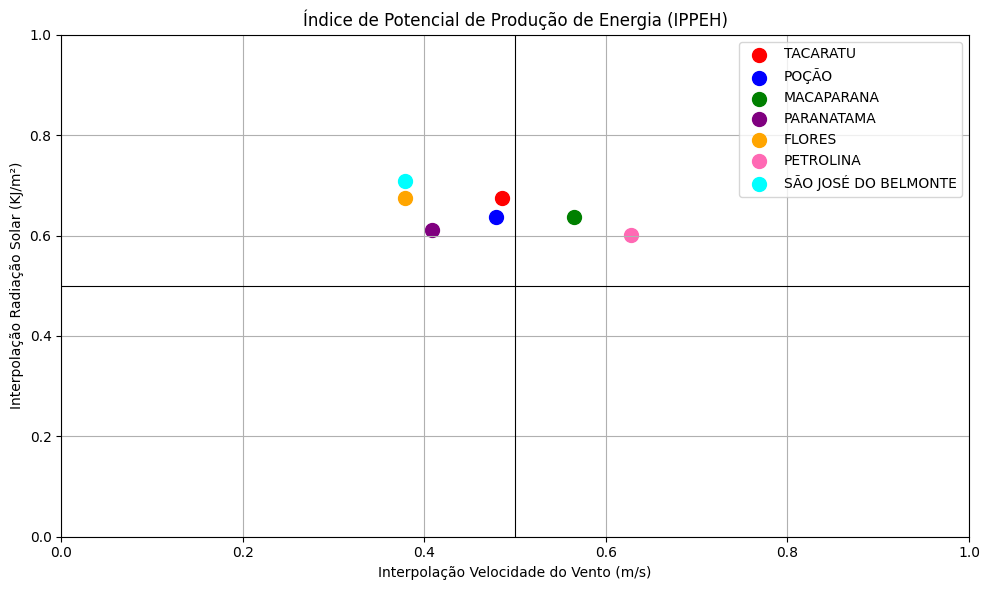

In [53]:
import matplotlib.pyplot as plt

cities =  ['TACARATU', 'POÇÃO',     'MACAPARANA',   'PARANATAMA', 'FLORES',   'PETROLINA', 'SÃO JOSÉ DO BELMONTE']
n_rad =   [0.675137,    0.636984,    0.637378,       0.610708,     0.673990,   0.600921,    0.708299]
n_wind =  [0.485207,    0.479290,    0.565089,       0.408284,     0.378698,   0.627219,    0.378698]
indices = [1.077192,    1.056539,    1.096570,       1.009451,     1.026006,   1.108215,    1.042592]
colors =  ['red',      'blue',     'green',        'purple',     'orange',      'hotpink',    'cyan']


plt.figure(figsize=(10, 6))
for city, x, y, idx, color in zip(cities, n_wind, n_rad, indices, colors):
    plt.scatter(x, y, color=color, label=city, s=100)

plt.axhline(0.5, color='black', linewidth=0.8)
plt.axvline(0.5, color='black', linewidth=0.8)
plt.xlabel('Interpolação Velocidade do Vento (m/s)')
plt.ylabel('Interpolação Radiação Solar (KJ/m²)')
plt.title('Índice de Potencial de Produção de Energia (IPPEH)')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('IPPEH.png', dpi=300, bbox_inches='tight')

plt.show()

# ÍNDICES DE GERAÇÃO DE ENERGIA EÓLICA PORTENCIAL - INDICAR QUAIS CIDADES TEM MAIOR POTENCIAL PARA PRODUÇÃO DE ENERGIA EÓLICA

##IDW

In [54]:
import pandas as pd
import numpy as np
from math import sqrt

file_path = '/content/drive/My Drive/TCC/inmet/medias_anuais_2003_2024_limpo.csv'
df = pd.read_csv(file_path)

def calculate_distance(lat1, lon1, alt1, lat2, lon2, alt2):
    return sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2 + ((alt1 - alt2) / 1000)**2)

def idw_interpolation(lat, lon, alt, points, power=2):
    weights = []
    values = []

    for _, row in points.iterrows():
        dist = calculate_distance(lat, lon, alt, row['latitude'], row['longitude'], row['altitude'])
        if dist == 0:
            return row['value']
        weight = 1 / (dist ** power)
        weights.append(weight)
        values.append(row['value'])

    return np.dot(weights, values) / sum(weights)

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']
    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = idw_interpolation(latitude, longitude, altitude, valid_points)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW".center(60))
    print("="*60)

    print("\n🌦️ Variáveis Interpoladas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        print(f"  → {vars_desc[var]}: {value}" if isinstance(value, str) else f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)


print("\nInterpolação para Tacaratu")
display_predictions(-9.1025, -38.1492, 514)

print("\nInterpolação para Poção")
display_predictions(-8.1858, -36.7050, 1000)

print("\nInterpolação para Macaparana")
display_predictions(-7.5522, -35.4417, 350)

print("\nInterpolação para Paranatama (FECHADA)")
display_predictions(-8.9208, -36.6581, 879)

print("\nInterpolação para FLORES")
display_predictions(-7.8658, -37.9750, 422)

print("\nInterpolação para PETROLINA")
display_predictions(-9.3883, -40.5233, 372)

print("\nInterpolação para SÃO JOSÉ DO BELMONTE")
display_predictions(-7.8608, -38.7600, 375)


Interpolação para Tacaratu

         PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW          

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1613.95
  → Temperatura Máxima (°C): 26.79
  → Temperatura Mínima (°C): 25.45
  → Velocidade do Vento (m/s): 2.94


Interpolação para Poção

         PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW          

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1522.81
  → Temperatura Máxima (°C): 24.38
  → Temperatura Mínima (°C): 23.09
  → Velocidade do Vento (m/s): 3.03


Interpolação para Macaparana

         PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW          

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1523.75
  → Temperatura Máxima (°C): 25.02
  → Temperatura Mínima (°C): 23.71
  → Velocidade do Vento (m/s): 3.20


Interpolação para Paranatama (FECHADA)

         PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO IDW          

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1460.04
  → Temperatura Máxima (°C): 22.39
  → Temperatu

##Krigagem

In [55]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from sklearn.preprocessing import StandardScaler

import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

file_path = '/content/drive/My Drive/TCC/inmet/medias_anuais_2003_2024_limpo.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError(f"Arquivo não encontrado: {file_path}\n"
                          "Verifique o caminho e se o arquivo foi gerado corretamente.")

def kriging_interpolation(latitude, longitude, altitude, known_points, var_name):

    if len(known_points) < 5:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Krigagem da variável {var_name}")
        return float(np.mean(known_points['value']))

    try:
        X = known_points[['latitude', 'longitude', 'altitude']].values
        y = known_points['value'].values

        scaler_X = StandardScaler()
        scaler_y = StandardScaler()
        X_scaled = scaler_X.fit_transform(X)
        y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

        kernel = ConstantKernel(1.0) * RBF(length_scale=1.0)

        gp = GaussianProcessRegressor(
            kernel=kernel,
            alpha=0.1,
            n_restarts_optimizer=10,
            random_state=42
        )
        gp.fit(X_scaled, y_scaled)

        X_pred = np.array([[latitude, longitude, altitude]])
        X_pred_scaled = scaler_X.transform(X_pred)

        y_pred_scaled = gp.predict(X_pred_scaled)

        y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

        return float(y_pred[0][0])

    except Exception as e:
        print(f"Erro na Krigagem para {var_name}: {str(e)}")
        return float(np.mean(known_points['value']))

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = kriging_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO POR KRIGAGEM".center(60))
    print("="*60)

    print("\n🌦️ Variáveis Interpoladas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        if isinstance(value, str):
            print(f"  → {vars_desc[var]}: {value}")
        else:
            print(f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)

print("\nInterpolação para Tacaratu")
display_predictions(-9.1025, -38.1492, 514)

print("\nInterpolação para Poção")
display_predictions(-8.1858, -36.7050, 1000)

print("\nInterpolação para Macaparana")
display_predictions(-7.5522, -35.4417, 350)

print("\nInterpolação para Paranatama (FECHADA)")
display_predictions(-8.9208, -36.6581, 879)

print("\nInterpolação para FLORES")
display_predictions(-7.8658, -37.9750, 422)

print("\nInterpolação para PETROLINA")
display_predictions(-9.3883, -40.5233, 372)

print("\nInterpolação para SÃO JOSÉ DO BELMONTE")
display_predictions(-7.8608, -38.7600, 375)


Interpolação para Tacaratu

     PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO POR KRIGAGEM     

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1551.16
  → Temperatura Máxima (°C): 25.78
  → Temperatura Mínima (°C): 24.54
  → Velocidade do Vento (m/s): 2.99


Interpolação para Poção

     PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO POR KRIGAGEM     

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1482.85
  → Temperatura Máxima (°C): 23.60
  → Temperatura Mínima (°C): 22.31
  → Velocidade do Vento (m/s): 2.97


Interpolação para Macaparana

     PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO POR KRIGAGEM     

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1579.07
  → Temperatura Máxima (°C): 25.37
  → Temperatura Mínima (°C): 24.04
  → Velocidade do Vento (m/s): 3.26


Interpolação para Paranatama (FECHADA)

     PREVISÃO METEOROLÓGICA - INTERPOLAÇÃO POR KRIGAGEM     

🌦️ Variáveis Interpoladas:
  → Radiação Global (Kj/m²): 1458.46
  → Temperatura Máxima (°C): 22.35
  → Temperatu

##RANDOM FOREST

In [56]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

file_path = '/content/drive/My Drive/TCC/inmet/medias_anuais_2003_2024_limpo.csv'
df = pd.read_csv(file_path)

def rf_interpolation(latitude, longitude, altitude, known_points, var_name):
    if len(known_points) < 10:
        print(f"Aviso: Poucos pontos disponíveis ({len(known_points)}) para Random Forest da variável {var_name}")
        return float(np.mean(known_points['value']))

    X = known_points[['latitude', 'longitude', 'altitude']].values
    y = known_points['value'].values

    rf = RandomForestRegressor(n_estimators=100,
                             random_state=42,
                             max_depth=5,
                             min_samples_split=3)
    rf.fit(X, y)

    X_new = np.array([[latitude, longitude, altitude]])

    y_new = rf.predict(X_new)

    return float(y_new[0])

def predict_new_location(latitude, longitude, altitude):
    target_vars = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

    results = {
        "Coordenadas": {
            "Latitude": latitude,
            "Longitude": longitude,
            "Altitude": altitude
        },
        "Variáveis": {}
    }

    city_means = df.groupby(['cidade', 'latitude', 'longitude', 'altitude'])[target_vars].mean().reset_index()

    for var in target_vars:
        valid_points = city_means[['latitude', 'longitude', 'altitude', var]].dropna()
        valid_points = valid_points.rename(columns={var: 'value'})

        if len(valid_points) == 0:
            results["Variáveis"][var] = "Dados indisponíveis"
            continue

        value = rf_interpolation(latitude, longitude, altitude, valid_points, var)
        results["Variáveis"][var] = round(value, 2)

    return results

def display_predictions(latitude, longitude, altitude):
    predictions = predict_new_location(latitude, longitude, altitude)

    print("\n" + "="*60)
    print("PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST".center(60))
    print("="*60)

    print("\n🌦️ Variáveis Previstas:")
    vars_desc = {
        'radiacao_global': 'Radiação Global (Kj/m²)',
        'temperatura_max': 'Temperatura Máxima (°C)',
        'temperatura_min': 'Temperatura Mínima (°C)',
        'velocidade_vento': 'Velocidade do Vento (m/s)'
    }

    for var, value in predictions['Variáveis'].items():
        if isinstance(value, str):
            print(f"  → {vars_desc[var]}: {value}")
        else:
            print(f"  → {vars_desc[var]}: {value:.2f}")

    print("\n" + "="*60)

print("\nInterpolação para Tacaratu")
display_predictions(-9.1025, -38.1492, 514)

print("\nInterpolação para Poção")
display_predictions(-8.1858, -36.7050, 1000)

print("\nInterpolação para Macaparana")
display_predictions(-7.5522, -35.4417, 350)

print("\nInterpolação para Paranatama (FECHADA)")
display_predictions(-8.9208, -36.6581, 879)

print("\nInterpolação para FLORES")
display_predictions(-7.8658, -37.9750, 422)

print("\nInterpolação para PETROLINA")
display_predictions(-9.3883, -40.5233, 372)

print("\nInterpolação para SÃO JOSÉ DO BELMONTE")
display_predictions(-7.8608, -38.7600, 375)


Interpolação para Tacaratu

       PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST        

🌦️ Variáveis Previstas:
  → Radiação Global (Kj/m²): 1542.49
  → Temperatura Máxima (°C): 27.11
  → Temperatura Mínima (°C): 25.73
  → Velocidade do Vento (m/s): 2.75


Interpolação para Poção

       PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST        

🌦️ Variáveis Previstas:
  → Radiação Global (Kj/m²): 1500.08
  → Temperatura Máxima (°C): 23.20
  → Temperatura Mínima (°C): 22.13
  → Velocidade do Vento (m/s): 2.90


Interpolação para Macaparana

       PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST        

🌦️ Variáveis Previstas:
  → Radiação Global (Kj/m²): 1417.30
  → Temperatura Máxima (°C): 25.20
  → Temperatura Mínima (°C): 23.85
  → Velocidade do Vento (m/s): 2.95


Interpolação para Paranatama (FECHADA)

       PREVISÃO METEOROLÓGICA - MODELO RANDOM FOREST        

🌦️ Variáveis Previstas:
  → Radiação Global (Kj/m²): 1441.24
  → Temperatura Máxima (°C): 22.98
  → Temperatura Mínima (°

#Plots

## EXEMPLO DE LEAVE-ONE-OUT

In [57]:
import folium
import json
import requests

url = "https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-26-mun.json"
response = requests.get(url)
pe_geojson = json.loads(response.text)

m = folium.Map(location=[-8.05, -37.5], zoom_start=7)

folium.GeoJson(
    pe_geojson,
    name='Pernambuco',
    style_function=lambda feature: {
        'fillColor': '#ffff00',
        'color': '#000000',
        'weight': 2,
        'fillOpacity': 0.1
    }
).add_to(m)

locations = [
    {"nome": "PETROLINA", "coords": [-9.388333, -40.523333], "altura": 372},
    {"nome": "OURICURI", "coords": [-7.885833, -40.102778], "altura": 458},
    {"nome": "CABROBO", "coords": [-8.503889, -39.315278], "altura": 343},
    {"nome": "SALGUEIRO", "coords": [-8.058056, -39.096111], "altura": 447},
    {"nome": "FLORESTA", "coords": [-8.598889, -38.584167], "altura": 327},
    {"nome": "SERRA TALHADA", "coords": [-7.954167, -38.295], "altura": 499},
    {"nome": "IBIMIRIM", "coords": [-8.509444, -37.711667], "altura": 434},
    {"nome": "ARCO VERDE", "coords": [-8.433611, -37.055556], "altura": 684},
    {"nome": "GARANHUNS", "coords": [-8.910833, -36.493333], "altura": 828},
    {"nome": "CARUARU", "coords": [-8.365278, -36.028333], "altura": 852},
    {"nome": "SURUBIM", "coords": [-7.839722, -35.801111], "altura": 410},
    {"nome": "PALMARES", "coords": [-8.666667, -35.568056], "altura": 164},
]

green_city_coords = locations[6]["coords"]

for i, loc in enumerate(locations, start=1):
    is_ibimirim = (i == 7)
    color = "#00FF00" if is_ibimirim else "#FF0000"
    letter = "I" if is_ibimirim else "B"

    folium.Marker(
        location=loc["coords"],
        popup=f"{loc['nome']}<br>Altitude: {loc['altura']}m",
        icon=folium.DivIcon(
            icon_size=(150, 36),
            icon_anchor=(18, 36),
            html=f"""
            <div style="
                font-size: 16pt;
                font-weight: bold;
                color: white;
                background-color: {color};
                border: 3px solid black;
                border-radius: 50%;
                width: 36px;
                height: 36px;
                display: flex;
                align-items: center;
                justify-content: center;
                text-shadow: 2px 2px 4px #000;
                box-shadow: 0 0 10px rgba(0,0,0,0.5);
            ">{letter}</div>
            """
        )
    ).add_to(m)

    if not is_ibimirim:
        folium.PolyLine(
            locations=[loc["coords"], green_city_coords],
            color="#FF0000",
            weight=4,
            dash_array="10, 10",
            opacity=0.9,
            line_cap='round',
            line_join='round',
            tooltip=f"Fluxo: {loc['nome']} → Ibimirim"
        ).add_to(m)

legend_html = """
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 280px;
    height: 130px;
    background: white;
    border: 3px solid black;
    z-index: 9999;
    font-size: 14px;
    font-weight: bold;
    padding: 10px;
    border-radius: 8px;
    box-shadow: 0 0 10px rgba(0,0,0,0.5);
">
    <div style="display: flex; align-items: center; margin-bottom: 8px;">
        <div style="background: #FF0000; width: 25px; height: 25px; border: 2px solid black; border-radius: 50%; margin-right: 10px; display: flex; align-items: center; justify-content: center; color: white; font-weight: bold;">B</div>
        <span>Cidades Base (Dados Originais)</span>
    </div>
    <div style="display: flex; align-items: center; margin-bottom: 8px;">
        <div style="background: #00FF00; width: 25px; height: 25px; border: 2px solid black; border-radius: 50%; margin-right: 10px; display: flex; align-items: center; justify-content: center; color: white; font-weight: bold;">I</div>
        <span>Cidade Interpolada (Ibimirim)</span>
    </div>
    <div style="display: flex; align-items: center;">
        <div style="width: 25px; margin-right: 10px;">
            <div style="border-top: 4px dashed #FF0000; width: 100%; margin-top: 6px;"></div>
        </div>
        <span>Relação de Interpolação</span>
    </div>
</div>
"""

m.get_root().html.add_child(folium.Element(legend_html))

title_html = """
<h2 align='center' style='font-size:24px; text-shadow: 2px 2px 4px #000000;'>
    Modelo de Interpolação para Ibimirim (I)
</h2>
"""
m.get_root().html.add_child(folium.Element(title_html))

m.save('leave-one-out.html')

m

In [58]:
import folium
import json
import requests

url = "https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-26-mun.json"
response = requests.get(url)
pe_geojson = json.loads(response.text)

m = folium.Map(location=[-8.05, -37.5], zoom_start=7)

folium.GeoJson(
    pe_geojson,
    name='Pernambuco',
    style_function=lambda feature: {
        'fillColor': '#ffff00',
        'color': '#000000',
        'weight': 2,
        'fillOpacity': 0.1
    }
).add_to(m)

locations = [
    {"nome": "PETROLINA", "coords": [-9.388333, -40.523333], "altura": 372},
    {"nome": "OURICURI", "coords": [-7.885833, -40.102778], "altura": 458},
    {"nome": "CABROBO", "coords": [-8.503889, -39.315278], "altura": 343},
    {"nome": "SALGUEIRO", "coords": [-8.058056, -39.096111], "altura": 447},
    {"nome": "FLORESTA", "coords": [-8.598889, -38.584167], "altura": 327},
    {"nome": "SERRA TALHADA", "coords": [-7.954167, -38.295], "altura": 499},
    {"nome": "IBIMIRIM", "coords": [-8.509444, -37.711667], "altura": 434},
    {"nome": "ARCO VERDE", "coords": [-8.433611, -37.055556], "altura": 684},
    {"nome": "GARANHUNS", "coords": [-8.910833, -36.493333], "altura": 828},
    {"nome": "CARUARU", "coords": [-8.365278, -36.028333], "altura": 852},
    {"nome": "SURUBIM", "coords": [-7.839722, -35.801111], "altura": 410},
    {"nome": "PALMARES", "coords": [-8.666667, -35.568056], "altura": 164},
]

TARGET_CITY_NAME = "FLORESTA"
target_city_data = next((loc for loc in locations if loc["nome"] == TARGET_CITY_NAME), None)
target_city_coords = target_city_data["coords"] if target_city_data else None

for loc in locations:
    is_target_city = (loc["nome"] == TARGET_CITY_NAME)
    color = "#00FF00" if is_target_city else "#FF0000"
    letter = "I" if is_target_city else "B"

    folium.Marker(
        location=loc["coords"],
        popup=f"{loc['nome']}<br>Altitude: {loc['altura']}m",
        icon=folium.DivIcon(
            icon_size=(150, 36),
            icon_anchor=(18, 36),
            html=f"""
            <div style="
                font-size: 16pt;
                font-weight: bold;
                color: white;
                background-color: {color};
                border: 3px solid black;
                border-radius: 50%;
                width: 36px;
                height: 36px;
                display: flex;
                align-items: center;
                justify-content: center;
                text-shadow: 2px 2px 4px #000;
                box-shadow: 0 0 10px rgba(0,0,0,0.5);
            ">{letter}</div>
            """
        )
    ).add_to(m)

    if not is_target_city and target_city_coords:
        folium.PolyLine(
            locations=[loc["coords"], target_city_coords],
            color="#FF0000",
            weight=4,
            dash_array="10, 10",
            opacity=0.9,
            line_cap='round',
            line_join='round',
            tooltip=f"Fluxo: {loc['nome']} → {TARGET_CITY_NAME}"
        ).add_to(m)

legend_html = f"""
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 280px;
    height: 130px;
    background: white;
    border: 3px solid black;
    z-index: 9999;
    font-size: 14px;
    font-weight: bold;
    padding: 10px;
    border-radius: 8px;
    box-shadow: 0 0 10px rgba(0,0,0,0.5);
">
    <div style="display: flex; align-items: center; margin-bottom: 8px;">
        <div style="background: #FF0000; width: 25px; height: 25px; border: 2px solid black; border-radius: 50%; margin-right: 10px; display: flex; align-items: center; justify-content: center; color: white; font-weight: bold;">B</div>
        <span>Cidades Base (Dados Originais)</span>
    </div>
    <div style="display: flex; align-items: center; margin-bottom: 8px;">
        <div style="background: #00FF00; width: 25px; height: 25px; border: 2px solid black; border-radius: 50%; margin-right: 10px; display: flex; align-items: center; justify-content: center; color: white; font-weight: bold;">I</div>
        <span>Cidade Interpolada ({TARGET_CITY_NAME.title()})</span>
    </div>
    <div style="display: flex; align-items: center;">
        <div style="width: 25px; margin-right: 10px;">
            <div style="border-top: 4px dashed #FF0000; width: 100%; margin-top: 6px;"></div>
        </div>
        <span>Relação de Interpolação</span>
    </div>
</div>
"""

m.get_root().html.add_child(folium.Element(legend_html))

title_html = f"""
<h2 align='center' style='font-size:24px; text-shadow: 2px 2px 4px #000000;'>
    Modelo de Interpolação para {TARGET_CITY_NAME.title()} (I)
</h2>
"""
m.get_root().html.add_child(folium.Element(title_html))

m

In [59]:
import folium
import json
import requests

url = "https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-26-mun.json"
response = requests.get(url)
pe_geojson = json.loads(response.text)

m = folium.Map(location=[-8.05, -37.5], zoom_start=7)

folium.GeoJson(
    pe_geojson,
    name='Pernambuco',
    style_function=lambda feature: {
        'fillColor': '#ffff00',
        'color': '#000000',
        'weight': 2,
        'fillOpacity': 0.1
    }
).add_to(m)

locations = [
    {"nome": "PETROLINA", "coords": [-9.388333, -40.523333], "altura": 372},
    {"nome": "OURICURI", "coords": [-7.885833, -40.102778], "altura": 458},
    {"nome": "CABROBO", "coords": [-8.503889, -39.315278], "altura": 343},
    {"nome": "SALGUEIRO", "coords": [-8.058056, -39.096111], "altura": 447},
    {"nome": "FLORESTA", "coords": [-8.598889, -38.584167], "altura": 327},
    {"nome": "SERRA TALHADA", "coords": [-7.954167, -38.295], "altura": 499},
    {"nome": "IBIMIRIM", "coords": [-8.509444, -37.711667], "altura": 434},
    {"nome": "ARCO VERDE", "coords": [-8.433611, -37.055556], "altura": 684},
    {"nome": "GARANHUNS", "coords": [-8.910833, -36.493333], "altura": 828},
    {"nome": "CARUARU", "coords": [-8.365278, -36.028333], "altura": 852},
    {"nome": "SURUBIM", "coords": [-7.839722, -35.801111], "altura": 410},
    {"nome": "PALMARES", "coords": [-8.666667, -35.568056], "altura": 164},
]

TARGET_CITY_NAME = "GARANHUNS"
target_city_data = next((loc for loc in locations if loc["nome"] == TARGET_CITY_NAME), None)
target_city_coords = target_city_data["coords"] if target_city_data else None

for loc in locations:
    is_target_city = (loc["nome"] == TARGET_CITY_NAME)
    color = "#00FF00" if is_target_city else "#FF0000"
    letter = "I" if is_target_city else "B"

    folium.Marker(
        location=loc["coords"],
        popup=f"{loc['nome']}<br>Altitude: {loc['altura']}m",
        icon=folium.DivIcon(
            icon_size=(150, 36),
            icon_anchor=(18, 36),
            html=f"""
            <div style="
                font-size: 16pt;
                font-weight: bold;
                color: white;
                background-color: {color};
                border: 3px solid black;
                border-radius: 50%;
                width: 36px;
                height: 36px;
                display: flex;
                align-items: center;
                justify-content: center;
                text-shadow: 2px 2px 4px #000;
                box-shadow: 0 0 10px rgba(0,0,0,0.5);
            ">{letter}</div>
            """
        )
    ).add_to(m)

    if not is_target_city and target_city_coords:
        folium.PolyLine(
            locations=[loc["coords"], target_city_coords],
            color="#FF0000",
            weight=4,
            dash_array="10, 10",
            opacity=0.9,
            line_cap='round',
            line_join='round',
            tooltip=f"Fluxo: {loc['nome']} → {TARGET_CITY_NAME}"
        ).add_to(m)

legend_html = f"""
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 280px;
    height: 130px;
    background: white;
    border: 3px solid black;
    z-index: 9999;
    font-size: 14px;
    font-weight: bold;
    padding: 10px;
    border-radius: 8px;
    box-shadow: 0 0 10px rgba(0,0,0,0.5);
">
    <div style="display: flex; align-items: center; margin-bottom: 8px;">
        <div style="background: #FF0000; width: 25px; height: 25px; border: 2px solid black; border-radius: 50%; margin-right: 10px; display: flex; align-items: center; justify-content: center; color: white; font-weight: bold;">B</div>
        <span>Cidades Base (Dados Originais)</span>
    </div>
    <div style="display: flex; align-items: center; margin-bottom: 8px;">
        <div style="background: #00FF00; width: 25px; height: 25px; border: 2px solid black; border-radius: 50%; margin-right: 10px; display: flex; align-items: center; justify-content: center; color: white; font-weight: bold;">I</div>
        <span>Cidade Interpolada ({TARGET_CITY_NAME.title()})</span>
    </div>
    <div style="display: flex; align-items: center;">
        <div style="width: 25px; margin-right: 10px;">
            <div style="border-top: 4px dashed #FF0000; width: 100%; margin-top: 6px;"></div>
        </div>
        <span>Relação de Interpolação</span>
    </div>
</div>
"""

m.get_root().html.add_child(folium.Element(legend_html))

title_html = f"""
<h2 align='center' style='font-size:24px; text-shadow: 2px 2px 4px #000000;'>
    Modelo de Interpolação para {TARGET_CITY_NAME.title()} (I)
</h2>
"""
m.get_root().html.add_child(folium.Element(title_html))

m

##CIDADES DA BASE DE DADOS

In [60]:
import folium
import json
import requests

url = "https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-26-mun.json"
response = requests.get(url)
pe_geojson = json.loads(response.text)

m = folium.Map(location=[-8.05, -37.5], zoom_start=7)

folium.GeoJson(
    pe_geojson,
    name='Pernambuco',
    style_function=lambda feature: {
        'fillColor': '#ffff00',
        'color': '#000000',
        'weight': 2,
        'fillOpacity': 0.1
    }
).add_to(m)

vibrant_colors = [
    "#FF0000",
    "#00FF00",
    "#0000FF",
    "#FF00FF",
    "#FFFF00",
    "#00FFFF",
    "#FF8000",
    "#8000FF",
    "#0080FF",
    "#FF0080",
    "#80FF00",
    "#FF8000"
]

locations = [
    {"nome": "PETROLINA", "coords": [-9.388333, -40.523333], "altura": 372},
    {"nome": "OURICURI", "coords": [-7.885833, -40.102778], "altura": 458},
    {"nome": "CABROBO", "coords": [-8.503889, -39.315278], "altura": 343},
    {"nome": "SALGUEIRO", "coords": [-8.058056, -39.096111], "altura": 447},
    {"nome": "FLORESTA", "coords": [-8.598889, -38.584167], "altura": 327},
    {"nome": "SERRA TALHADA", "coords": [-7.954167, -38.295], "altura": 499},
    {"nome": "IBIMIRIM", "coords": [-8.509444, -37.711667], "altura": 434},
    {"nome": "ARCO VERDE", "coords": [-8.433611, -37.055556], "altura": 684},
    {"nome": "GARANHUNS", "coords": [-8.910833, -36.493333], "altura": 828},
    {"nome": "CARUARU", "coords": [-8.365278, -36.028333], "altura": 852},
    {"nome": "SURUBIM", "coords": [-7.839722, -35.801111], "altura": 410},
    {"nome": "PALMARES", "coords": [-8.666667, -35.568056], "altura": 164},
]

for i, loc in enumerate(locations, start=1):
    folium.Marker(
        location=loc["coords"],
        popup=f"{loc['nome']}<br>Altitude: {loc['altura']}m",
        icon=folium.DivIcon(
            icon_size=(150, 36),
            icon_anchor=(18, 36),
            html=f"""
            <div style="
                font-size: 16pt;
                font-weight: bold;
                color: white;
                background-color: {vibrant_colors[i-1]};
                border: 3px solid black;
                border-radius: 50%;
                width: 36px;
                height: 36px;
                display: flex;
                align-items: center;
                justify-content: center;
                text-shadow: 2px 2px 4px #000;
                box-shadow: 0 0 10px rgba(0,0,0,0.5);
            ">{i}</div>
            """
        )
    ).add_to(m)

folium.LayerControl().add_to(m)
m.get_root().html.add_child(folium.Element("<h2 align='center'>Pernambuco - Localizações Destacadas</h2>"))
m.save('base-de-dados.html')
m

##CIDADES INTERPOLADAS

In [61]:
import folium
import json
import requests

url = "https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-26-mun.json"
response = requests.get(url)
pe_geojson = json.loads(response.text)

m = folium.Map(location=[-8.05, -37.5], zoom_start=7)

folium.GeoJson(
    pe_geojson,
    name='Pernambuco',
    style_function=lambda feature: {
        'fillColor': '#ffff00',
        'color': '#000000',
        'weight': 2,
        'fillOpacity': 0.1
    }
).add_to(m)

vibrant_colors = [
    "#FF0000",
    "#00FF00",
    "#0000FF",
    "#FF00FF",
    "#FFFF00",
    "#00FFFF",
    "#FF8000"
]

locations = [
    {"nome": "Petrolina", "coords": [-9.3883, -40.5233], "altura": 372},
    {"nome": "São José do Belmonte", "coords": [-7.8608, -38.7600], "altura": 375},
    {"nome": "Tacaratu", "coords": [-9.1025, -38.1492], "altura": 514},
    {"nome": "Flores", "coords": [-7.8658, -37.9750], "altura": 422},
    {"nome": "Poção", "coords": [-8.1858, -36.7050], "altura": 1000},
    {"nome": "Paranatama", "coords": [-8.9208, -36.6581], "altura": 879},
    {"nome": "Macaparana", "coords": [-7.5522, -35.4417], "altura": 350}

]

for i, loc in enumerate(locations, start=1):
    folium.Marker(
        location=loc["coords"],
        popup=f"{loc['nome']}<br>Altitude: {loc['altura']}m",
        icon=folium.DivIcon(
            icon_size=(150, 36),
            icon_anchor=(18, 36),
            html=f"""
            <div style="
                font-size: 16pt;
                font-weight: bold;
                color: white;
                background-color: {vibrant_colors[i-1]};
                border: 3px solid black;
                border-radius: 50%;
                width: 36px;
                height: 36px;
                display: flex;
                align-items: center;
                justify-content: center;
                text-shadow: 2px 2px 4px #000;
                box-shadow: 0 0 10px rgba(0,0,0,0.5);
            ">{i}</div>
            """
        )
    ).add_to(m)

folium.LayerControl().add_to(m)
m.get_root().html.add_child(folium.Element("<h2 align='center'>Pernambuco - Localizações Destacadas</h2>"))
m.save('cidades-validacao.html')
m

# Outros plots

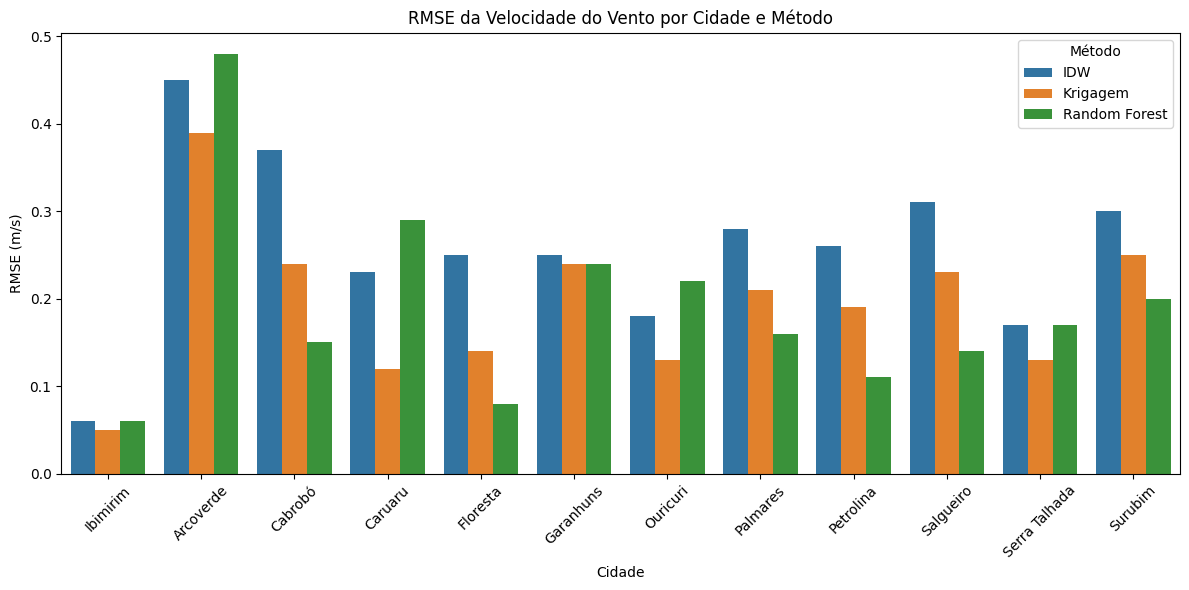

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Cidade': [
        "Ibimirim", "Arcoverde", "Cabrobó", "Caruaru", "Floresta",
        "Garanhuns", "Ouricuri", "Palmares", "Petrolina", "Salgueiro",
        "Serra Talhada", "Surubim"
    ],
    'IDW': [0.06, 0.45, 0.37, 0.23, 0.25, 0.25, 0.18, 0.28, 0.26, 0.31, 0.17, 0.30],
    'Krigagem': [0.05, 0.39, 0.24, 0.12, 0.14, 0.24, 0.13, 0.21, 0.19, 0.23, 0.13, 0.25],
    'Random Forest': [0.06, 0.48, 0.15, 0.29, 0.08, 0.24, 0.22, 0.16, 0.11, 0.14, 0.17, 0.20]
}

df = pd.DataFrame(data)
df_melted = df.melt(id_vars='Cidade', var_name='Método', value_name='RMSE')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Cidade', y='RMSE', hue='Método')
plt.title('RMSE da Velocidade do Vento por Cidade e Método')
plt.ylabel('RMSE (m/s)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('rmse_velocidade_do_vento.png', dpi=300, bbox_inches='tight')
plt.show()

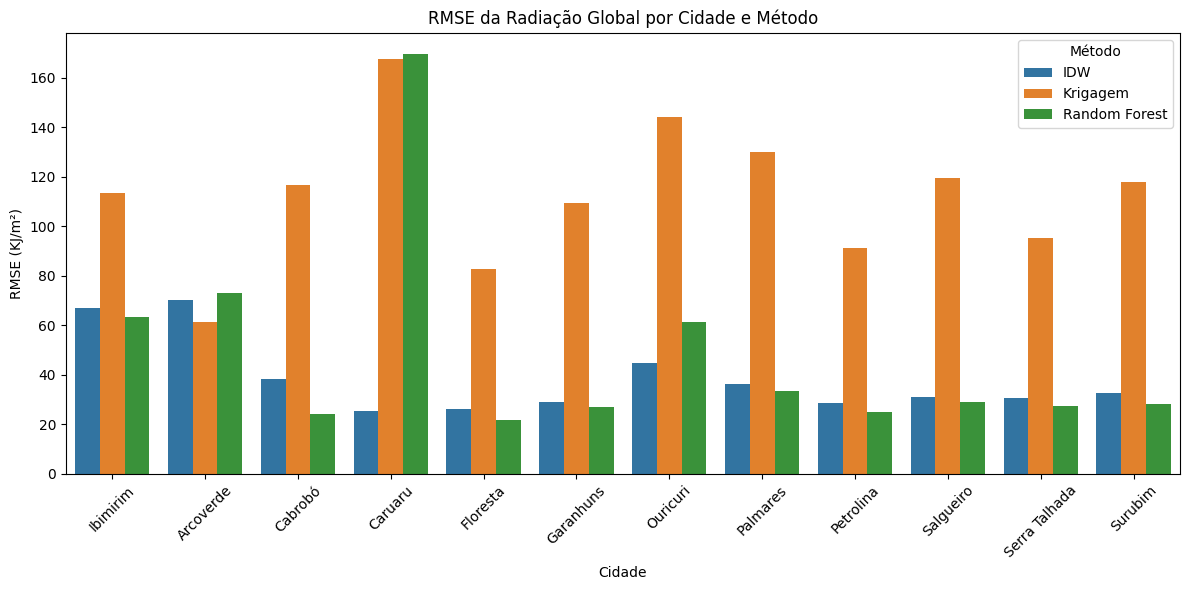

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_rad = {
    'Cidade': [
        "Ibimirim", "Arcoverde", "Cabrobó", "Caruaru", "Floresta",
        "Garanhuns", "Ouricuri", "Palmares", "Petrolina", "Salgueiro",
        "Serra Talhada", "Surubim"
    ],
    'IDW': [66.75, 70.34, 38.17, 25.14, 26.28, 29.00, 44.81, 36.20, 28.40, 31.15, 30.66, 32.40],
    'Krigagem': [113.26, 61.40, 116.78, 167.71, 82.59, 109.23, 144.27, 129.85, 91.30, 119.47, 95.42, 117.87],
    'Random Forest': [63.27, 73.12, 24.05, 169.70, 21.68, 26.72, 61.30, 33.22, 25.00, 29.11, 27.17, 28.13]
}

df_rad = pd.DataFrame(data_rad)
df_rad_melted = df_rad.melt(id_vars='Cidade', var_name='Método', value_name='RMSE')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_rad_melted, x='Cidade', y='RMSE', hue='Método')
plt.title('RMSE da Radiação Global por Cidade e Método')
plt.ylabel('RMSE (KJ/m²)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('rmse_radiacao_global.png', dpi=300, bbox_inches='tight')
plt.show()

Gráfico da Temperatura Máxima salvo como 'rmse_temperatura_maxima.png'


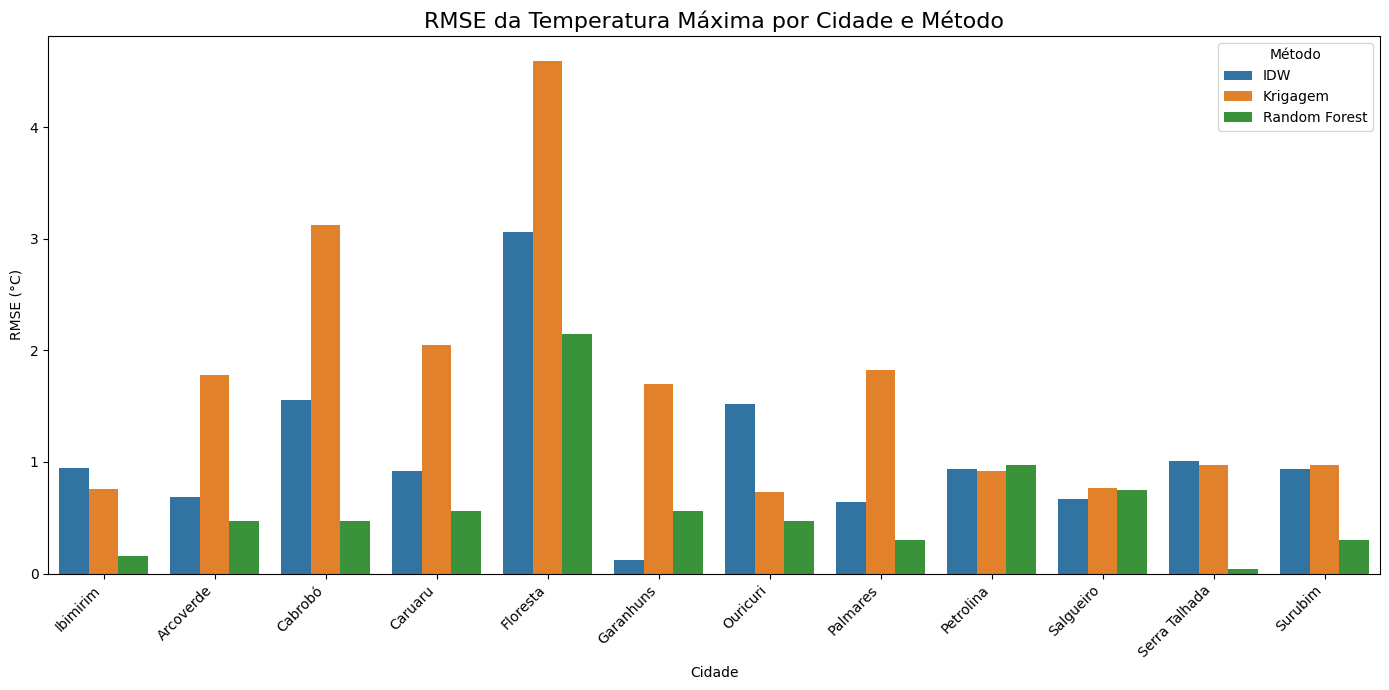

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_max = {
    'Cidade': [
        "Ibimirim", "Arcoverde", "Cabrobó", "Caruaru", "Floresta",
        "Garanhuns", "Ouricuri", "Palmares", "Petrolina", "Salgueiro",
        "Serra Talhada", "Surubim"
    ],
    'IDW': [0.95, 0.69, 1.56, 0.92, 3.06, 0.12, 1.52, 0.64, 0.94, 0.67, 1.01, 0.94],
    'Krigagem': [0.76, 1.78, 3.12, 2.05, 4.59, 1.70, 0.73, 1.82, 0.92, 0.77, 0.97, 0.97],
    'Random Forest': [0.16, 0.47, 0.47, 0.56, 2.15, 0.56, 0.47, 0.30, 0.97, 0.75, 0.04, 0.30]
}

df_max = pd.DataFrame(data_max)
df_max_melted = df_max.melt(id_vars='Cidade', var_name='Método', value_name='RMSE')

plt.figure(figsize=(14, 7))
sns.barplot(data=df_max_melted, x='Cidade', y='RMSE', hue='Método')
plt.title('RMSE da Temperatura Máxima por Cidade e Método', fontsize=16)
plt.xlabel('Cidade')
plt.ylabel('RMSE (°C)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('rmse_temperatura_maxima.png', dpi=300, bbox_inches='tight')
print("Gráfico da Temperatura Máxima salvo como 'rmse_temperatura_maxima.png'")

plt.show()

Gráfico da Temperatura Mínima salvo como 'rmse_temperatura_minima.png'


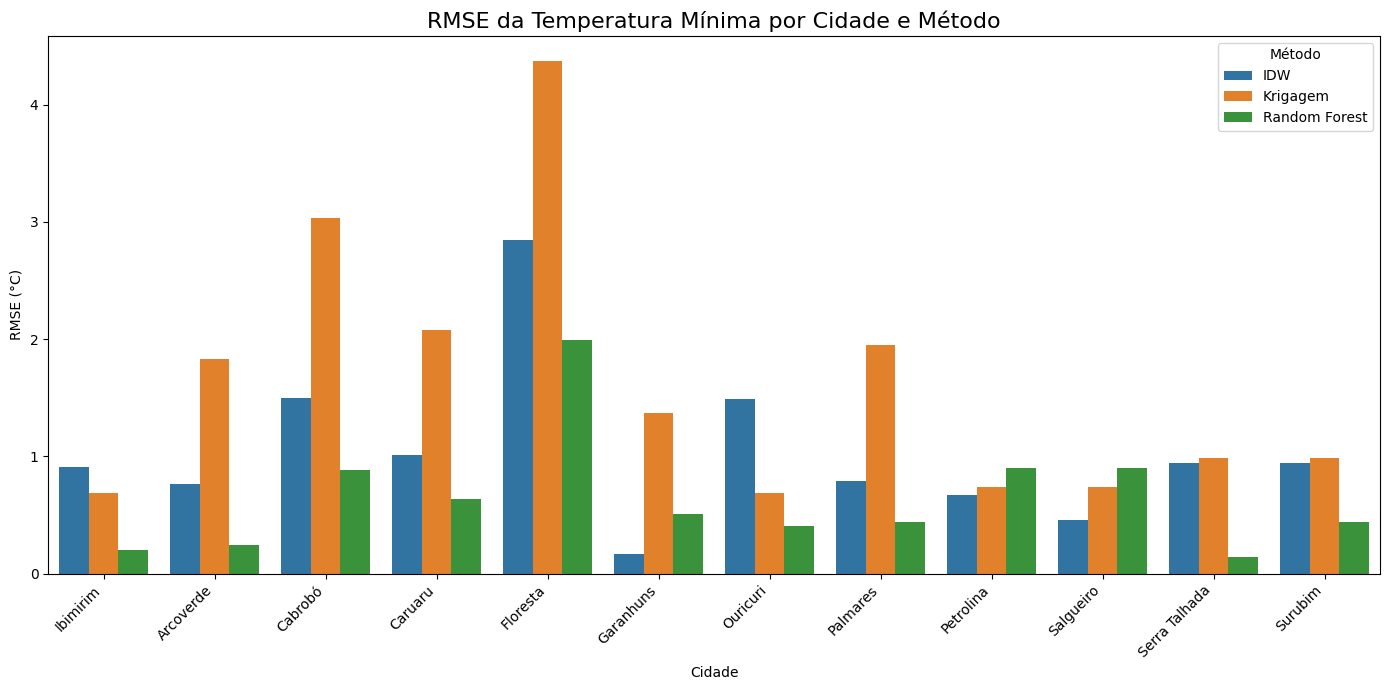

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_min = {
    'Cidade': [
        "Ibimirim", "Arcoverde", "Cabrobó", "Caruaru", "Floresta",
        "Garanhuns", "Ouricuri", "Palmares", "Petrolina", "Salgueiro",
        "Serra Talhada", "Surubim"
    ],
    'IDW': [0.91, 0.76, 1.50, 1.01, 2.85, 0.17, 1.49, 0.79, 0.67, 0.46, 0.94, 0.94],
    'Krigagem': [0.69, 1.83, 3.03, 2.08, 4.37, 1.37, 0.69, 1.95, 0.74, 0.74, 0.99, 0.99],
    'Random Forest': [0.20, 0.24, 0.88, 0.64, 1.99, 0.51, 0.41, 0.44, 0.90, 0.90, 0.14, 0.44]
}

df_min = pd.DataFrame(data_min)
df_min_melted = df_min.melt(id_vars='Cidade', var_name='Método', value_name='RMSE')

plt.figure(figsize=(14, 7))
sns.barplot(data=df_min_melted, x='Cidade', y='RMSE', hue='Método')
plt.title('RMSE da Temperatura Mínima por Cidade e Método', fontsize=16)
plt.xlabel('Cidade')
plt.ylabel('RMSE (°C)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('rmse_temperatura_minima.png', dpi=300, bbox_inches='tight')
print("Gráfico da Temperatura Mínima salvo como 'rmse_temperatura_minima.png'")


plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dados carregados com sucesso!
O conjunto de dados tem 196 linhas e 9 colunas.

Gerando e salvando os histogramas de distribuição em um único quadro...
Gráfico salvo como: histogramas_combinados.png


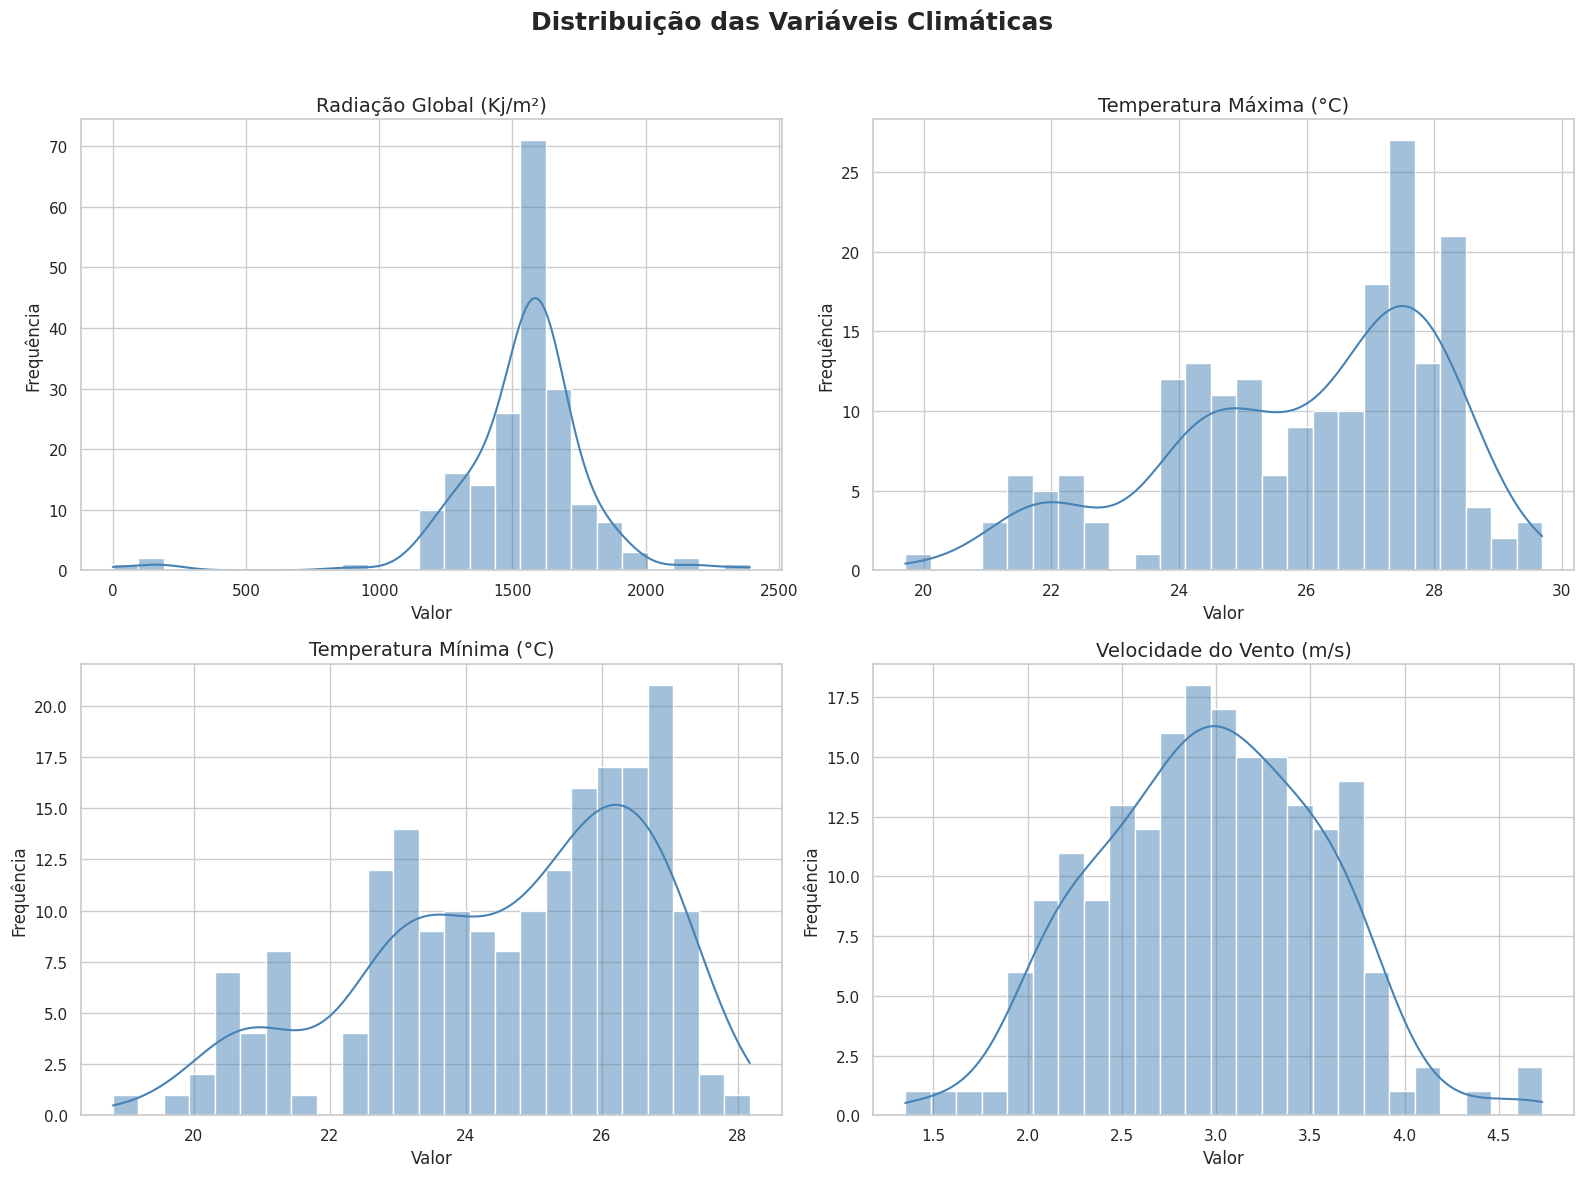


Gerando e salvando o boxplot...
Gráfico salvo como: boxplot_outliers.png


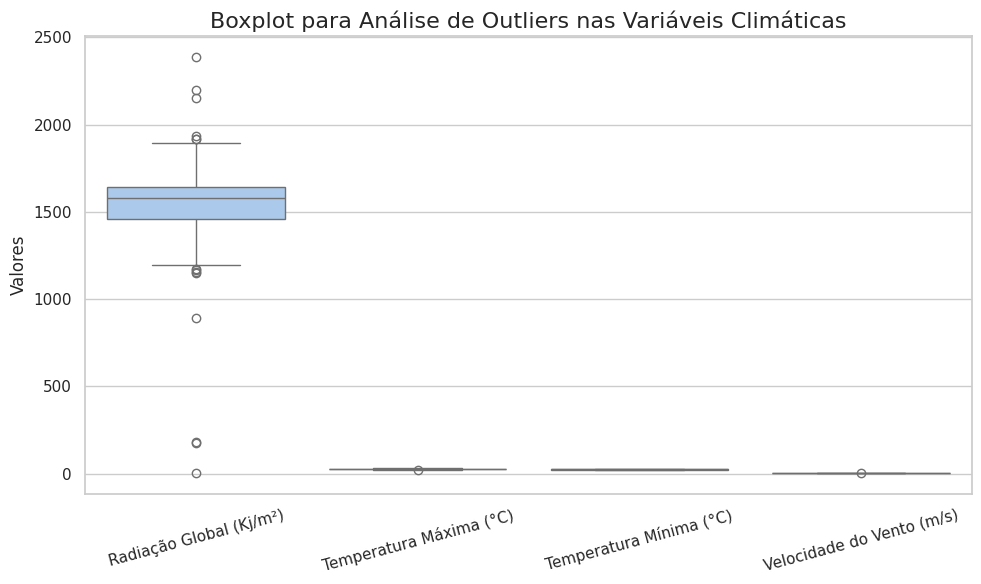

In [69]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

file_path = '/content/drive/My Drive/TCC/inmet/medias_anuais_2003_2024_limpo.csv'

try:
    df = pd.read_csv(file_path)
    print("Dados carregados com sucesso!")
    print(f"O conjunto de dados tem {df.shape[0]} linhas e {df.shape[1]} colunas.")
except FileNotFoundError:
    print(f"Erro: O arquivo não foi encontrado no caminho especificado: {file_path}")

variaveis = ['radiacao_global', 'temperatura_max', 'temperatura_min', 'velocidade_vento']

titulos_variaveis = {
    'radiacao_global': 'Radiação Global (Kj/m²)',
    'temperatura_max': 'Temperatura Máxima (°C)',
    'temperatura_min': 'Temperatura Mínima (°C)',
    'velocidade_vento': 'Velocidade do Vento (m/s)'
}

print("\nGerando e salvando os histogramas de distribuição em um único quadro...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

fig.suptitle('Distribuição das Variáveis Climáticas', fontsize=18, fontweight='bold')

for ax, var in zip(axes.flatten(), variaveis):
    sns.histplot(data=df, x=var, kde=True, bins=25, ax=ax, color='steelblue')
    ax.set_title(titulos_variaveis.get(var, var), fontsize=14)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frequência')

plt.tight_layout(rect=[0, 0, 1, 0.96])

nome_arquivo_histogramas = 'histogramas_combinados.png'
plt.savefig(nome_arquivo_histogramas, dpi=300)
print(f"Gráfico salvo como: {nome_arquivo_histogramas}")

plt.show()

print("\nGerando e salvando o boxplot...")

plt.figure(figsize=(10, 6))

sns.boxplot(data=df[variaveis], palette="pastel")

plt.title('Boxplot para Análise de Outliers nas Variáveis Climáticas', fontsize=16)
plt.ylabel('Valores', fontsize=12)
plt.xticks(ticks=range(len(variaveis)), labels=[titulos_variaveis[var] for var in variaveis], rotation=15)

plt.tight_layout()

nome_arquivo_boxplot = 'boxplot_outliers.png'
plt.savefig(nome_arquivo_boxplot, dpi=300)
print(f"Gráfico salvo como: {nome_arquivo_boxplot}")


plt.show()